In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import astropy
from astropy.io import fits
import astropy.wcs
from astropy import units as u
from astropy.coordinates import SkyCoord
from reproject import reproject_interp


In [3]:
from utils import get_imgarr, get_median, get_vmin_vmax, get_mean_pix
from utils import find_t_peak, find_t_shift, diff, get_tshift_scale_offset
from utils import get_mean_pix

In [4]:
import scipy as sp
from scipy.interpolate import splrep, splev
import scipy.optimize as opt
import pickle
from scipy.ndimage import gaussian_filter1d


In [5]:
plt.style.use('default')


54

obs_mjd

tmpID=296582, mjd=56745.06, date=140309/29?

tmpID=523435, mjd=57452.20, date=160305

57

tmpID=403910, mjd=57050.24061164, date=2015-01-28

### load image

In [6]:
img54_diff, header54_diff= get_imgarr(fitsfile="EtaCar/ec0915a5457_images/54/ec0915.190222.826208_ooi_i_v1_N22_140329.296582_ooi_i_v1_N22.diff.fits", 
                        idx=0, return_header=True)

img_spitzer, header_spitzer= get_imgarr(fitsfile="EtaCar/SPITZER_I4_12914176_0000_6_E8351909_maic.fits", 
                        idx=0, return_header=True)

# project to same coordinates
img_spitzer_proj54, footprint_spitzer_proj54 = reproject_interp((img_spitzer, header_spitzer), header54_diff)

wcs54 = astropy.wcs.WCS(header54_diff)


In [7]:
img54_tmpl, header54_tmpl= get_imgarr(fitsfile="EtaCar/ec0915a54.tmp/ec0915.140329.296582_ooi_i_v1_N22.sw.fits", 
                        idx=0, return_header=True)


In [8]:
img57_tmpl, header57_tmpl= get_imgarr(fitsfile="EtaCar/ec0915a5457_images/57/2015/ec0915.150128.403910_ooi_i_v1_N26.sw.fits", 
                        idx=0, return_header=True)

#img_spitzer, header_spitzer= get_imgarr(fitsfile="EtaCar/SPITZER_I4_12914176_0000_6_E8351909_maic.fits", 
#                        idx=0, return_header=True)

# project to same coordinates
img_spitzer_proj57, footprint_spitzer_proj57 = reproject_interp((img_spitzer, header_spitzer), header57_tmpl)

wcs57 = astropy.wcs.WCS(header57_tmpl)


### fits all from 54

In [399]:
df_good_fits_all_i = pd.read_csv('df_good_fits_all.csv',)


In [411]:
df_good_fits_all_i[idx2]['a_norm'].shape

(36,)

In [412]:
df_good_fits_all_g[idx1]['a_norm'].shape

(36,)

In [445]:
ng

0     1.464429
1     1.295159
2     1.270326
3     1.176495
4     0.956874
5     1.367512
6     0.931370
7     0.981616
9     0.776392
10    0.649774
11    0.639988
12    0.656313
13    0.648375
14    1.071040
15    1.166360
16    1.015864
17    1.107746
18    1.272447
19    1.663078
20    2.131263
21    1.384197
22    1.385953
23    1.292381
24    1.629043
25    1.136211
26    1.382597
27    1.327832
28    1.760935
29    2.051784
30    1.856833
31    2.671054
32    2.228675
33    1.698879
34    1.694717
35    2.190702
4     2.084175
Name: a_norm, dtype: float64

In [444]:
ni

0     1.769157
1     1.527461
2     1.315355
3     1.357752
4     0.993915
5     1.494276
6     0.882859
7     1.089508
9     2.116317
10    1.045793
11    1.392495
12    1.230362
13    1.492918
21    1.428133
22    1.422403
23    1.080817
24    1.320251
25    2.192991
26    2.419771
27    3.619103
28    1.813516
29    2.009510
30    1.902181
31    2.115046
32    1.165991
33    1.606713
34    1.559097
35    2.075490
36    2.462874
37    2.100326
38    3.907055
40    2.882397
41    3.072931
42    1.274921
44    2.859371
58    3.592857
Name: a_norm, dtype: float64

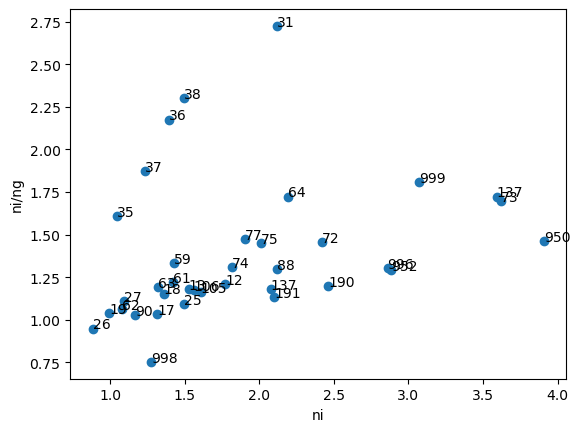

In [610]:

ni = df_good_fits_all_i[idx2]['a_norm'].values

ng = df_good_fits_all_g[idx1]['a_norm'].values

plt.plot(ni, ni/ng, 'o')

plt.xlabel('ni')
plt.ylabel('ni/ng')

for i, ID  in enumerate(df_good_fits_all_g[idx1]['ID'].values):
    plt.text(ni[i], (ni/ng )[i], ID)
    


In [618]:
ni/ng / ni

array([0.68286   , 0.77210593, 0.78719926, 0.84998269, 1.04506914,
       0.73125477, 1.07368681, 1.01872821, 1.28800966, 1.53899651,
       1.56252952, 1.52366396, 1.54231735, 0.93367204, 0.85736822,
       0.98438419, 0.90273374, 0.78588752, 0.60129479, 0.46920524,
       0.72244056, 0.72152536, 0.77376554, 0.61385744, 0.88011815,
       0.72327636, 0.75310704, 0.56788024, 0.48738072, 0.53855151,
       0.37438402, 0.44869703, 0.58862361, 0.59006888, 0.45647474,
       0.47980612])

In [605]:
IDs_good_fits_57

[117, 119, 120, 135, 137, 152, 155]

In [606]:
IDs_good_fits_poly1

[12,
 13,
 17,
 18,
 19,
 25,
 26,
 27,
 31,
 35,
 36,
 37,
 38,
 59,
 61,
 62,
 63,
 64,
 72,
 73,
 74,
 75,
 77,
 88,
 90,
 105,
 106,
 137,
 190,
 191,
 950,
 952,
 999,
 998,
 996]

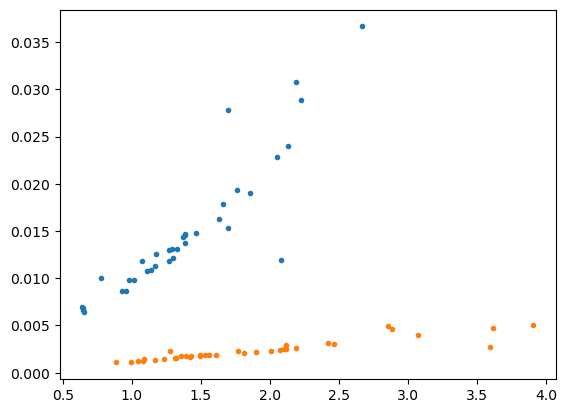

In [462]:

idx1 = df_good_fits_all_g['ID'].isin(IDs_good_fits_poly1)

plt.plot(df_good_fits_all_g[idx1]['a_norm'], 1/df_good_fits_all_g[idx1]['height'], '.')

idx2 = df_good_fits_all_i['ID'].isin(IDs_good_fits_poly1)

plt.plot(df_good_fits_all_i[idx2]['a_norm'], 1/df_good_fits_all_i[idx2]['height'], '.')




In [466]:
for di in range(2000):
    print(di, np.unique(dic_df_poly1[di]['zpt']))


0 [28.768 30.469 30.572 30.605]
1 [28.768 30.469 30.572 30.605]
2 [28.768 30.469 30.572 30.605]
3 [28.768 30.469 30.572 30.605]
4 [28.768 30.469 30.572 30.605]
5 [28.768 30.469 30.572 30.605]
6 [28.768 30.469 30.572 30.605]
7 [28.768 30.469 30.572 30.605]
8 [28.768 30.469 30.572 30.605]
9 [28.768 30.469 30.572 30.605]
10 [28.768 30.469 30.572 30.605]
11 [28.768 30.469 30.572 30.605]
12 [28.768 30.469 30.572 30.605]
13 [28.768 30.469 30.572 30.605]
14 [28.768 30.469 30.572 30.605]
15 [28.768 30.469 30.572 30.605]
16 [30.469 30.572 30.605]
17 [30.469 30.572 30.605]
18 [30.469 30.572 30.605]
19 [30.469 30.572 30.605]
20 [30.469 30.572 30.605]
21 [28.768 30.469 30.572 30.605]
22 [28.768 30.469 30.572 30.605]
23 [28.768 30.469 30.572 30.605]
24 [28.768 30.469 30.572 30.605]
25 [28.768 30.469 30.572 30.605]
26 [28.768 30.469 30.572 30.605]
27 [28.768 30.469 30.572 30.605]
28 [28.768 30.469 30.572 30.605]
29 [28.768 30.469 30.572 30.605]
30 [28.768 30.469 30.572 30.605]
31 [28.768 30.469 30.5

In [470]:
for di in IDs_good_fits_57:
    print(di, np.unique(dic_df_57[di]['zpt']))


117 [28.822 30.35  30.494 30.519 30.593 30.63  30.631 30.645]
119 [28.822 30.35  30.494 30.519 30.593 30.63  30.631 30.645]
120 [28.822 30.35  30.494 30.519 30.593 30.63  30.631 30.645]
135 [28.822 30.35  30.494 30.519 30.593 30.63  30.631 30.645]
137 [28.822 30.35  30.494 30.519 30.593 30.63  30.631 30.645]
152 [28.822 30.35  30.494 30.519 30.593 30.63  30.631 30.645]
155 [28.822 30.35  30.494 30.519 30.593 30.63  30.631 30.645]


### get light curves

In [9]:
def load_lc_from_url(txtfile):
    '''load light curve from url 
    https://stsci-transients.stsci.edu/eta/etalc/results
    return: DataFrame'''
    #txtfile = f'https://stsci-transients.stsci.edu/eta/etalc/results/rod_test/ec0915/54/ec0915_54_poly1pos_i_tmpl{tmpID}_ID{posID}_lc.txt'
    #if field==54:
    #    txtfile =f'https://stsci-transients.stsci.edu/eta/etalc/results/rod_test/ec0915i_poly1/ec0915/54/ec0915_54_poly1pos_i_tmpl{tmpID}_ID{posID}_lc.txt'
    #elif field==57:
    #    txtfile=f'https://stsci-transients.stsci.edu/eta/etalc/results/rod_test/ec0915/57/ec0915_57_poly1pos_i_tmpl{tmpID}_ID{posID}_lc.txt'
    
    #df = pd.read_csv(txtfile, delim_whitespace=True)
    df = pd.read_csv(txtfile, sep='\s+')
    
    # remove nan 
    df = df[df['Jyas2'].notna()]
    
    df['Jyas2'] *= 1e6
    df['Jyas2_err'] *= 1e6

    #idx_drop = df['ID'][df['Jyas2_err']>=1].index.to_list()
    #idx_drop = [58, 59, 60, 61, 180, 199]
    #print('drop', idx_drop)
    #df.drop(idx_drop, inplace=True)   
    # reset index
    #df.reset_index() 
    df['good'] = (df['Jyas2_err']<=1) & (df['fluxADU']<3000) # and (df[''] remove high unreal flux data
    
    return df


### load lc from url

#### field 54

In [192]:
# g-band field 54
tmpID = 523730
flt = 'g'
field = 54
#posID = 14

dic_df = {}
#'https://stsci-transients.stsci.edu/eta/etalc/results/rod_test/poly1_g/\
#ec0915/54/ec0915a54_poly1pos_g_tmpl523730_ID2_lc.txt'
for posID in range(2317):
    txtfile = f'https://stsci-transients.stsci.edu/eta/etalc/results/'\
          f'rod_test/poly1_{flt}/ec0915/{field}/'\
          f'ec0915a{field}_poly1pos_{flt}_tmpl{tmpID}_ID{posID}_lc.txt'
    
    df = load_lc_from_url(txtfile)
    dic_df[posID] = df
    print(posID, field, flt)
    


0 54 g
1 54 g
2 54 g
3 54 g
4 54 g
5 54 g
6 54 g
7 54 g
8 54 g
9 54 g
10 54 g
11 54 g
12 54 g
13 54 g
14 54 g
15 54 g
16 54 g
17 54 g
18 54 g
19 54 g
20 54 g
21 54 g
22 54 g
23 54 g
24 54 g
25 54 g
26 54 g
27 54 g
28 54 g
29 54 g
30 54 g
31 54 g
32 54 g
33 54 g
34 54 g
35 54 g
36 54 g
37 54 g
38 54 g
39 54 g
40 54 g
41 54 g
42 54 g
43 54 g
44 54 g
45 54 g
46 54 g
47 54 g
48 54 g
49 54 g
50 54 g
51 54 g
52 54 g
53 54 g
54 54 g
55 54 g
56 54 g
57 54 g
58 54 g
59 54 g
60 54 g
61 54 g
62 54 g
63 54 g
64 54 g
65 54 g
66 54 g
67 54 g
68 54 g
69 54 g
70 54 g
71 54 g
72 54 g
73 54 g
74 54 g
75 54 g
76 54 g
77 54 g
78 54 g
79 54 g
80 54 g
81 54 g
82 54 g
83 54 g
84 54 g
85 54 g
86 54 g
87 54 g
88 54 g
89 54 g
90 54 g
91 54 g
92 54 g
93 54 g
94 54 g
95 54 g
96 54 g
97 54 g
98 54 g
99 54 g
100 54 g
101 54 g
102 54 g
103 54 g
104 54 g
105 54 g
106 54 g
107 54 g
108 54 g
109 54 g
110 54 g
111 54 g
112 54 g
113 54 g
114 54 g
115 54 g
116 54 g
117 54 g
118 54 g
119 54 g
120 54 g
121 54 g
122 54 g
123

In [193]:
dic_df_poly1 = dic_df

In [51]:
len(dic_df)

2316

In [194]:
# write the variable
with open('ec0915g_poly1.pkl', 'wb') as file:
    pickle.dump(dic_df, file)

#### field 57

In [195]:
# g-band field 57
tmpID = 523730
flt = 'g'
field = 57
#posID = 14

dic_df = {}

for posID in range(306):
    txtfile = f'https://stsci-transients.stsci.edu/eta/etalc/results/'\
          f'rod_test/poly1_{flt}/ec0915/{field}/'\
          f'ec0915a{field}_poly1pos_{flt}_tmpl{tmpID}_ID{posID}_lc.txt'
    
    df = load_lc_from_url(txtfile)
    dic_df[posID] = df
    print(posID, field, flt)
    


0 57 g
1 57 g
2 57 g
3 57 g
4 57 g
5 57 g
6 57 g
7 57 g
8 57 g
9 57 g
10 57 g
11 57 g
12 57 g
13 57 g
14 57 g
15 57 g
16 57 g
17 57 g
18 57 g
19 57 g
20 57 g
21 57 g
22 57 g
23 57 g
24 57 g
25 57 g
26 57 g
27 57 g
28 57 g
29 57 g
30 57 g
31 57 g
32 57 g
33 57 g
34 57 g
35 57 g
36 57 g
37 57 g
38 57 g
39 57 g
40 57 g
41 57 g
42 57 g
43 57 g
44 57 g
45 57 g
46 57 g
47 57 g
48 57 g
49 57 g
50 57 g
51 57 g
52 57 g
53 57 g
54 57 g
55 57 g
56 57 g
57 57 g
58 57 g
59 57 g
60 57 g
61 57 g
62 57 g
63 57 g
64 57 g
65 57 g
66 57 g
67 57 g
68 57 g
69 57 g
70 57 g
71 57 g
72 57 g
73 57 g
74 57 g
75 57 g
76 57 g
77 57 g
78 57 g
79 57 g
80 57 g
81 57 g
82 57 g
83 57 g
84 57 g
85 57 g
86 57 g
87 57 g
88 57 g
89 57 g
90 57 g
91 57 g
92 57 g
93 57 g
94 57 g
95 57 g
96 57 g
97 57 g
98 57 g
99 57 g
100 57 g
101 57 g
102 57 g
103 57 g
104 57 g
105 57 g
106 57 g
107 57 g
108 57 g
109 57 g
110 57 g
111 57 g
112 57 g
113 57 g
114 57 g
115 57 g
116 57 g
117 57 g
118 57 g
119 57 g
120 57 g
121 57 g
122 57 g
123

In [ ]:
dic_df_57 = dic_df

In [196]:
# write the variable
with open('ec0915g_57_poly1.pkl', 'wb') as file:
    pickle.dump(dic_df, file)

In [200]:
IDs_good_fits_57

[117, 118, 119, 120, 135, 136, 137, 152, 154, 155, 171, 188, 205, 206, 207]

#### comet

In [ ]:
IDs_comet_poly1 = [1421, 1422]

# to do get more from comet dense region



#### Armin's pos new reduction

In [14]:

# g-band
tmpID = 523730
flt = 'g'
field = 54
#posID = 14

dic_df = {}

for posID in range(4):
    txtfile = f'https://stsci-transients.stsci.edu/eta/etalc/results/rod_test'\
    f'/Armins_g/ec0915/54/ec0915a54_Arminspos_g_tmpl{tmpID}_ID{posID}_lc.txt'
    
    df = load_lc_from_url(txtfile)
    dic_df[posID] = df
    print(posID, field, flt)



0 54 g
1 54 g
2 54 g
3 54 g


In [15]:
dic_df_54_Arm = dic_df

In [438]:
dic_df_54_Arm[0]['mjd']

dic_df_54_Arm[0]['']


ID     x     y  bsize           mjd     zpt  fluxADU  flux_err  X2norm  \
0     0  3909  1392      3  56255.304405  30.469   -11.43      5.80    1.20   
1     0  3909  1392      3  56255.305900  30.469   -10.93      6.05    1.32   
2     0  3909  1392      3  56341.278127  30.469    -6.34      3.58    0.29   
3     0  3909  1392      3  56341.283970  30.469    -7.98      4.14    0.40   
4     0  3909  1392      3  56341.286605  30.469    -3.62      3.89    0.90   
..   ..   ...   ...    ...           ...     ...      ...       ...     ...   
125   0  3909  1392      3  60433.031302  30.469    -7.02      4.01    1.83   
126   0  3909  1392      3  60439.030163  30.469    -4.32      3.62    1.13   
127   0  3909  1392      3  60495.998941  28.768    -4.56      4.09    2.13   
128   0  3909  1392      3  60502.002281  30.572   -26.60      3.65    1.34   
129   0  3909  1392      3  60664.306395  30.605   -20.41      6.31    1.50   

     Npix  ...  filter  CONVOL00  PHOTNORM  KSUM00  FSIG00 FSCAT00   FWHM  \
0       9  ...       g  TEMPLATE         t  0.5659   1.227   0.071  4.458   
1       9  ...       g  TEMPLATE         t  0.5627   1.214   0.065  4.492   
2       9  ...       g  TEMPLATE         t  1.2394   1.323   0.119  4.464   
3       9  ...       g  TEMPLATE         t  1.2343   1.191   0.045  5.725   
4       9  ...       g  TEMPLATE         t  1.2383   1.282   0.106  5.205   
..    ...  ...     ...       ...       ...     ...     ...     ...    ...   
125     9  ...       g  TEMPLATE         t  1.1566   1.674   0.241  4.725   
126     9  ...       g  TEMPLATE         t  1.1604   1.701   0.265  4.914   
127     9  ...       g  TEMPLATE         i  0.2047   1.188   0.144  4.337   
128     9  ...       g  TEMPLATE         i  1.1269   1.992   0.233  6.385   
129     9  ...       g  TEMPLATE         i  1.1191   1.660   0.209  3.522   

    M5SIGMA  SKYADU  good  
0    23.012   511.0  True  
1    23.003   517.0  True  
2    23.460  1032.0  True  
3    23.190  1015.0  True  
4    23.264  1023.0  True  
..      ...     ...   ...  
125  23.423   680.0  True  
126  23.375   680.0  True  
127  21.753   630.0  True  
128  23.174   596.0  True  
129  23.271  1744.0  True  

[128 rows x 27 columns]

In [16]:
# write the variable
with open('ec0915g_54_Arm.pkl', 'wb') as file:
    pickle.dump(dic_df, file)

Text(0.5, 1.0, 'g band')

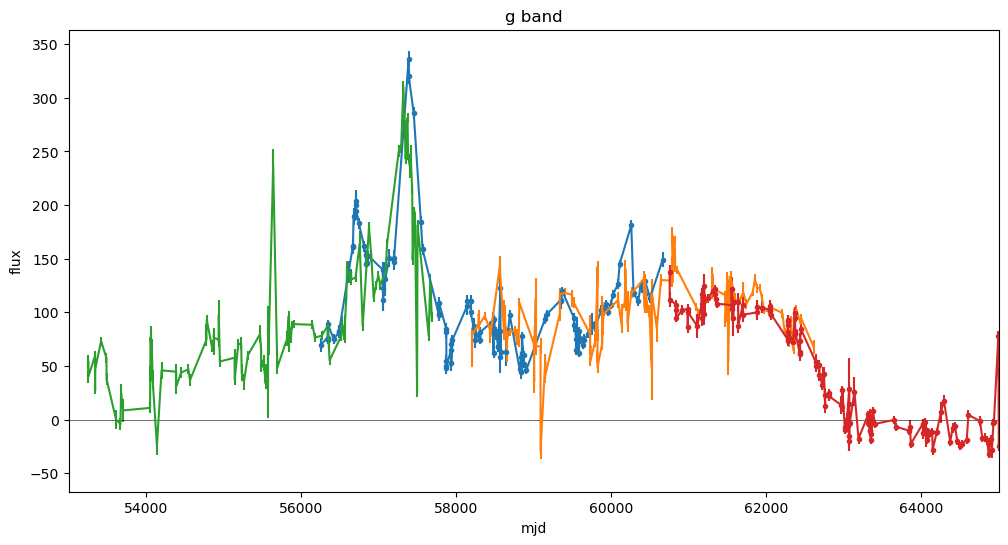

In [426]:
plt.figure(figsize=(12, 6))


zero_offset = 100
Id = 19 


df = dic_df_poly1[Id] 

#t = df['mjd'].values
#f = df['Jyas2'].values
#f_err =  df['Jyas2_err'].values

#ax.errorbar(t, f, f_err, fmt='.')
idx = ( df.good ) & (df['fluxADU']<1000)
t = df[idx]['mjd'].values
f = df[idx]['fluxADU'].values
f_err =  df[idx]['flux_err'].values
plt.errorbar(t, f + 180 + zero_offset, f_err, fmt='.-', alpha=1, )

# new reduction armin's pos

txtfile = 'https://stsci-transients.stsci.edu/eta/etalc/results/'\
            'rod_test/Armins_g/ec0915/54/ec0915a54_Arminspos_g_tmpl523730_ID1_lc.txt'

df_ = load_lc_from_url(txtfile)
plt.errorbar(df_['mjd'] + 1950, 1.8*df_['fluxADU'] + zero_offset, df_['flux_err'], )


#------------------------------

txtfile = 'https://stsci-transients.stsci.edu/eta/etalc/results/rod_test/'\
        'poly1_g/ec0915/57/ec0915a57_poly1pos_g_tmpl523730_ID120_lc.txt'

df_57 = load_lc_from_url(txtfile)
plt.errorbar(df_57['mjd']-3000, 3*df_57['fluxADU']-60 + zero_offset, df_57['flux_err'], )

# comet
#Id = IDs_comet[5]
Id = 1421
df = dic_df_poly1[Id] 

#t = df['mjd'].values
#f = df['Jyas2'].values
#f_err =  df['Jyas2_err'].values

#ax.errorbar(t, f, f_err, fmt='.')
idx = ( df.good ) & (df['fluxADU']<3000)
t = df[idx]['mjd'].values
f = df[idx]['fluxADU'].values
f_err =  df[idx]['flux_err'].values
plt.errorbar(t+4500, 1.2 * f + zero_offset, f_err, fmt='.-', alpha=1, )


#----
plt.axhline(y=0, color='k', linewidth=0.4)

plt.xlabel('mjd')
plt.ylabel('flux')

plt.xlim([53000, 65000])
plt.title('g band')

use norm factor from i band

residual vs ; 



### load light curves

In [10]:
# Load the variable back
with open('ec0915g_poly1.pkl', 'rb') as file:
    dic_df_poly1 = pickle.load(file)


In [ ]:
# Load the variable back
with open('ec0915g_54_2.pkl', 'rb') as file:
    dic_df_poly2 = pickle.load(file)


In [12]:
# Load the variable back
with open('ec0915g_57_poly1.pkl', 'rb') as file:
    dic_df_57 = pickle.load(file)


In [ ]:
with open('ec0915g_comet.pkl', 'rb') as file:
    dic_df_comet = pickle.load(file)

In [14]:
with open('ec0915g_54_Arm.pkl', 'rb') as file:
    dic_df_54_Arm = pickle.load(file)

### IDs_good


In [15]:
IDs_good_fits_poly1 = [12, 13, 17, 18, 19, 25, 26, 27, 29, 31, 35, 36, 37, 
                38, 44, 45, 46, 48, 49, 50, 51, 59, 61, 62, 63, 64, 
                72, 73, 74, 75, 77, 88, 90, 105, 106, 137, 190, 191, 
                950, 951, 952, 999, 998, 997, 996, 1000, 1001, 1002, 1042, 1043, 1044, 1045]

In [16]:
IDs_good_fits_57 = [117, 118, 119, 120, 135, 136, 137, 
           152, 154, 155, 171, 188, 205, 206, 207,]

In [17]:
IDs_comet = [236,      261, 262, 263, 264, 285, 286, 287, 288, 
             289, 311, 312, 313, 314, 336, 337, 338, 339, 
             361, 362, 363, 364, 365, 387, 388, 389, 390, 
                  413, 414, ]


In [18]:
IDs_comet_poly1 = [1321, 1322, 1371, 1372, 1421, 1422, ]

In [19]:
IDs_54_Arm = [0, 1, 2, 3]

In [201]:
len(dic_df_poly1)

2317

(-200.0, 250.0)

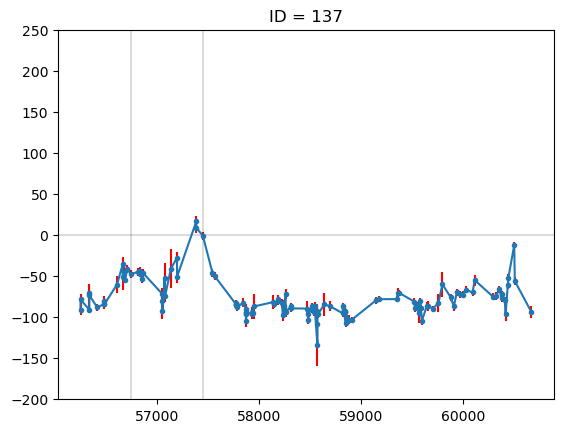

In [20]:
# plot one light curve
Id = IDs_good_fits_poly1[35]

#Id = 390
df = dic_df_poly1[Id] 

#t = df['mjd'].values
#f = df['Jyas2'].values
#f_err =  df['Jyas2_err'].values

#ax.errorbar(t, f, f_err, fmt='.')
idx = ( df.good ) & (df['fluxADU']<3000)
t = df[idx]['mjd'].values
f = df[idx]['fluxADU'].values
f_err =  df[idx]['flux_err'].values
plt.errorbar(t, f, f_err, fmt='.-', alpha=1, ecolor='r')
plt.title(f'ID = {Id}')

plt.axvline(x=57452, color='k', linewidth=.2)
plt.axvline(x=56745, color='k', linewidth=.2, label='tmpl')

plt.axhline(y=0, color='k', linewidth=.2)

plt.ylim([-200, 250]) 

In [ ]:
## Id = 1422
#df = dic_df_comet[Id] 

df = dic_df_poly1[Id]

#t = df['mjd'].values
#f = df['Jyas2'].values
#f_err =  df['Jyas2_err'].values

#ax.errorbar(t, f, f_err, fmt='.')
idx = df.good
t = df[idx]['mjd'].values
f = df[idx]['fluxADU'].values
f_err =  df[idx]['flux_err'].values

# --------
fig = plt.figure(figsize=(8, 4), dpi=100)

ax = fig.add_subplot(1, 2, 2)

ax.errorbar(t, f, f_err, fmt='.-', alpha=1)
ax.set_title(f'ID = {Id}')

ax.axvline(x=57452, color='k', linewidth=.2)
ax.axvline(x=56745, color='k', linewidth=.2, label='tmpl')

ax.axhline(y=0, color='k', linewidth=.2)

#-------------------

img = img54_diff
vmin, vmax = get_vmin_vmax(img)

ax = fig.add_subplot(1, 2, 1, projection=wcs54)

ax.imshow(img, vmin=vmin, vmax=vmax, interpolation=None,
                cmap='gray', origin='lower', alpha=0.7)

## add circle 
xc = df['x'][0]
yc = df['y'][0]
circle = matplotlib.patches.Circle(xy=(xc, yc), radius=3*15, 
                                       transform=ax.transData,
                               color='r', linewidth=.1*30, fill=False)
ax.add_patch(circle)
ax.text(xc+10, yc, f"{Id:0d}", fontsize=1*10, alpha=1,)

ax.set_xlim([2600, 4600])
ax.set_ylim([500, 2500])


### 54 

12
13
17
18
19
25
26
27
31
35
36
37
38
59
61
62
63
64
72
73
74
75
77
88
90
105
106
137
190
191
950
952
999
998
996


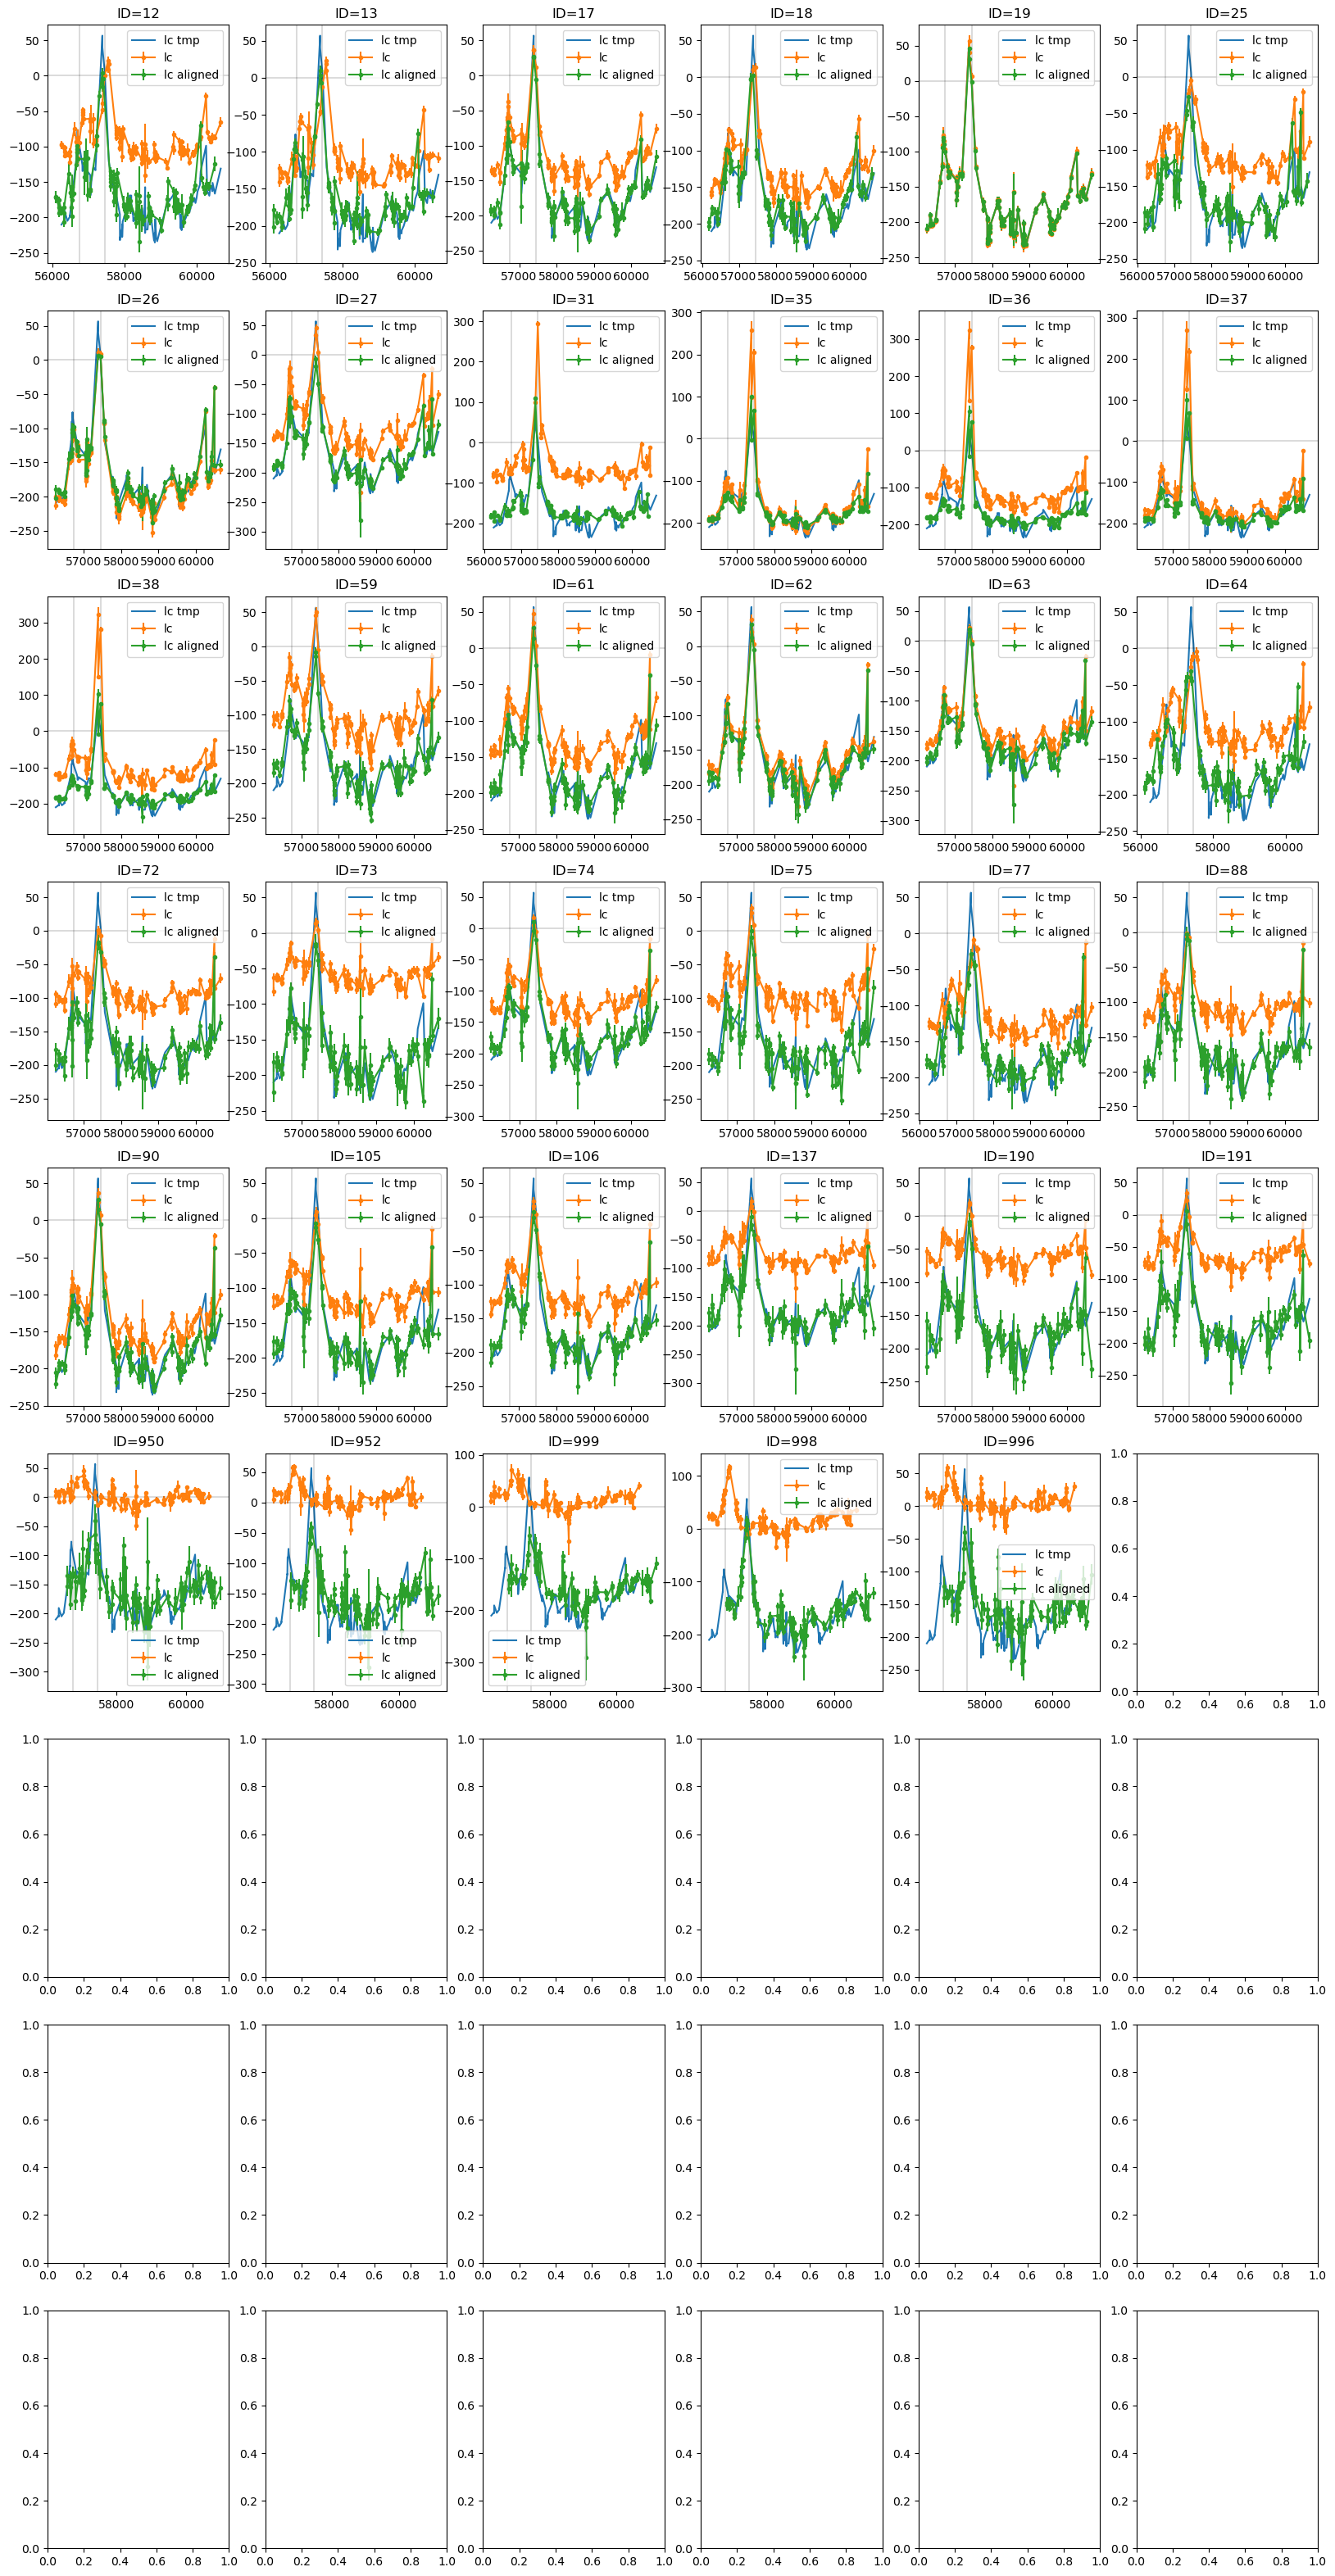

In [38]:

Id = 19
dic_df = dic_df_poly1

df = dic_df[Id]
idx = ( df.good ) & (df['fluxADU']<1000)
t1 = df[idx]['mjd'].values
#f1 = df[idx]['Jyas2'].values
f1 = df[idx]['fluxADU'].values
f1_err = df[idx]['flux_err'].values

fig, axs = plt.subplots(9, 6, figsize=(20, 40))
axs = axs.flatten() 

tshifts = []
a_norms = []
b_offsets = []

heights = []

posx = []
posy = []

for i, Id in enumerate(IDs_good_fits_poly1):
    
    #Id = 12
    df = dic_df[Id]
    
    posx.append(df['x'][0])
    posy.append(df['y'][0])
    
    
    idx = ( df.good ) & (df['fluxADU']<1000)

    t2 = df[idx]['mjd'].values
    #f2 = df[idx]['Jyas2'].values
    f2 = df[idx]['fluxADU'].values
    f2_err = df[idx]['flux_err'].values
    
    tshift, a, b = get_tshift_scale_offset(t1, f1, t2, f2)

    tshifts.append(tshift)
    a_norms.append(a)
    b_offsets.append(b)

    height = np.sort(f2)[-10:].mean() - np.sort(f2)[10:].mean()
    heights.append(height)
    
    ax = axs[i]

    ax.plot(t1, f1, label='lc tmp')
    #ax.plot(t2, f2, label='lc')
    #ax.plot(t2-tshift, f2*a + b, alpha=.5, label='lc aligned')
    # show errorbar
    #ax.errorbar(t1, f1, f1_err, fmt='.-', alpha=1, label='lc tmp')
    ax.errorbar(t2, f2, f2_err, fmt='.-', alpha=1, label='lc')
    ax.errorbar(t2-tshift, f2*a +b, f2_err*a, fmt='.-', alpha=1, label='lc aligned')

    #-------
    ax.axvline(x=57452, color='k', linewidth=.2)
    ax.axvline(x=56745, color='k', linewidth=.2, )
    ax.axhline(y=0, color='k', linewidth=.2)

    ax.legend()
    ax.set_title(f'ID={Id}')
    print(Id)


In [611]:
df_good_fits_all_g

ID     x     y          RA        Dec       tshift    a_norm    b_offset  \
0    12  4011   816  161.033913 -60.310010   157.759772  1.464429  -28.148664   
1    13  4026   816  161.031642 -60.310006   157.763902  1.295159  -20.011877   
2    17  4086   816  161.022557 -60.309988     0.994266  1.270326  -19.682343   
3    18  4101   816  161.020285 -60.309983    64.861636  1.176495  -14.158040   
4    19  4116   816  161.018014 -60.309978     0.000000  0.956874   -7.748891   
5    25  4056   831  161.027108 -60.308872    64.861636  1.367512  -20.750453   
6    26  4071   831  161.024837 -60.308867     0.994266  0.931370   -3.368993   
7    27  4086   831  161.022566 -60.308863     0.994266  0.981616  -51.899443   
8    28  4101   831  161.020295 -60.308858   563.654782  0.292141 -125.699216   
9    31  3981   846  161.038473 -60.307769    64.861636  0.776392 -119.229878   
10   35  4041   846  161.029389 -60.307751     0.000000  0.649774  -66.981822   
11   36  4056   846  161.027118 -60.307747     0.000000  0.639988 -102.011516   
12   37  4071   846  161.024846 -60.307742     0.000000  0.656313  -75.947563   
13   38  4086   846  161.022575 -60.307738     0.000000  0.648375 -106.171532   
14   59  4026   876  161.031678 -60.305506     0.994266  1.071040  -62.817056   
15   61  4056   876  161.027136 -60.305497     0.000000  1.166360  -27.521709   
16   62  4071   876  161.024865 -60.305492     0.994266  1.015864   -8.000752   
17   63  4086   876  161.022594 -60.305488     0.994266  1.107746   -4.623533   
18   64  4101   876  161.020323 -60.305483   157.763902  1.272447  -25.236430   
19   72  4011   891  161.033958 -60.304385     0.000000  1.663078  -19.426410   
20   73  4026   891  161.031687 -60.304381     0.994266  2.131263  -47.846461   
21   74  4041   891  161.029416 -60.304376     0.994266  1.384197  -11.901248   
22   75  4056   891  161.027145 -60.304372     0.000000  1.385953  -47.073223   
23   77  4086   891  161.022603 -60.304363    64.861636  1.292381  -16.494669   
24   88  4026   906  161.031696 -60.303256     0.994266  1.629043    0.279461   
25   90  4056   906  161.027154 -60.303247     0.000000  1.136211  -13.566160   
26  105  4041   921  161.029434 -60.302126     0.994266  1.382597  -19.637963   
27  106  4056   921  161.027163 -60.302122     0.000000  1.327832  -23.460000   
28  137  4026   951  161.031723 -60.299881     0.000000  1.760935  -39.683844   
29  190  3951   996  161.043102 -60.296528     0.000000  2.051784  -49.565597   
30  191  3966   996  161.040831 -60.296524     0.000000  1.856833  -55.591169   
31  950  3576  1356  161.100020 -60.269622  -331.080012  2.671054 -160.780140   
32  952  3606  1356  161.095483 -60.269616  -520.348090  2.228675 -172.300887   
33  999  3621  1371  161.093221 -60.268487  -520.348090  1.698879 -177.916586   
34  998  3606  1371  161.095490 -60.268491  -532.345485  1.694717 -183.000453   
35  996  3576  1371  161.100027 -60.268497  -520.348090  2.190702 -170.443721   
0   117  2046  2316  161.015727 -60.356118  -775.033503  1.221176 -164.519414   
1   119  2076  2316  161.011178 -60.356119  2872.014989  2.087174 -184.983137   
2   120  2091  2316  161.008903 -60.356120  2931.864391  2.446196 -196.440925   
3   135  2046  2331  161.015726 -60.354993  2721.654808  2.140976 -201.860351   
4   137  2076  2331  161.011177 -60.354994  2872.014989  2.084175 -204.305716   
5   152  2031  2346  161.017999 -60.353867  2608.020951  3.967015 -193.736886   
6   155  2076  2346  161.011176 -60.353869  2721.654808  2.375715 -206.906314   

        height  flux_ctio  flux_ctio_mean  flux_spitzer  flux_spitzer_mean  
0    67.839909       1630     1664.222168     50.371693          50.339977  
1    82.169545       1632     1636.222168     41.268181          41.271641  
2    84.314909       1796     1768.111084     41.395737          41.463753  
3    79.472182       1760     1763.000000     45.536926          45.584179  
4   115.042767       1848     1858.555542     47.089825

In [37]:
IDs_good_fits_poly1 = [12, 13, 17, 18, 19, 25, 26, 27, 31, 35, 36, 37, 38, 
                      59, 61, 62, 63, 64, 72, 73, 74, 75, 77, 88, 90, 
                      105, 106, 137, 190, 191, 950, 952, 999, 998, 996, ]

In [24]:
dic_df[0].columns

Index(['ID', 'x', 'y', 'bsize', 'mjd', 'zpt', 'fluxADU', 'flux_err', 'X2norm',
       'Npix', 'Nmask', 'Jyas2', 'Jyas2_err', 'SB', 'SB_err', 'skip', 'imID',
       'filter', 'CONVOL00', 'PHOTNORM', 'KSUM00', 'FSIG00', 'FSCAT00', 'FWHM',
       'M5SIGMA', 'SKYADU', 'good'],
      dtype='object')

In [39]:
df_good_fits = pd.DataFrame()
df_good_fits['ID'] = IDs_good_fits_poly1
df_good_fits['x'] = posx
df_good_fits['y'] = posy
df_good_fits['RA'] = wcs54.pixel_to_world(posx, posy).ra.deg
df_good_fits['Dec'] = wcs54.pixel_to_world(posx, posy).dec.deg

# values from fitting

df_good_fits['tshift'] = tshifts
df_good_fits['a_norm'] = a_norms
df_good_fits['b_offset'] = b_offsets
df_good_fits['height'] = heights


# values from FITS image
df_good_fits['flux_ctio'] = img54_tmpl[posy, posx].astype(np.int32)
df_good_fits['flux_ctio_mean'] = get_mean_pix(img54_tmpl, df_good_fits['x'], df_good_fits['y'])

df_good_fits['flux_spitzer'] = img_spitzer_proj54[posy, posx].astype(np.float32)
df_good_fits['flux_spitzer_mean'] = get_mean_pix(img_spitzer_proj54, df_good_fits['x'], df_good_fits['y'])


df_good_fits54 = df_good_fits.copy()


In [390]:
df_good_fits54

ID     x     y          RA        Dec      tshift    a_norm    b_offset  \
0    12  4011   816  161.033913 -60.310010  157.759772  1.464429  -28.148664   
1    13  4026   816  161.031642 -60.310006  157.763902  1.295159  -20.011877   
2    17  4086   816  161.022557 -60.309988    0.994266  1.270326  -19.682343   
3    18  4101   816  161.020285 -60.309983   64.861636  1.176495  -14.158040   
4    19  4116   816  161.018014 -60.309978    0.000000  0.956874   -7.748891   
5    25  4056   831  161.027108 -60.308872   64.861636  1.367512  -20.750453   
6    26  4071   831  161.024837 -60.308867    0.994266  0.931370   -3.368993   
7    27  4086   831  161.022566 -60.308863    0.994266  0.981616  -51.899443   
8    28  4101   831  161.020295 -60.308858  563.654782  0.292141 -125.699216   
9    31  3981   846  161.038473 -60.307769   64.861636  0.776392 -119.229878   
10   35  4041   846  161.029389 -60.307751    0.000000  0.649774  -66.981822   
11   36  4056   846  161.027118 -60.307747    0.000000  0.639988 -102.011516   
12   37  4071   846  161.024846 -60.307742    0.000000  0.656313  -75.947563   
13   38  4086   846  161.022575 -60.307738    0.000000  0.648375 -106.171532   
14   59  4026   876  161.031678 -60.305506    0.994266  1.071040  -62.817056   
15   61  4056   876  161.027136 -60.305497    0.000000  1.166360  -27.521709   
16   62  4071   876  161.024865 -60.305492    0.994266  1.015864   -8.000752   
17   63  4086   876  161.022594 -60.305488    0.994266  1.107746   -4.623533   
18   64  4101   876  161.020323 -60.305483  157.763902  1.272447  -25.236430   
19   72  4011   891  161.033958 -60.304385    0.000000  1.663078  -19.426410   
20   73  4026   891  161.031687 -60.304381    0.994266  2.131263  -47.846461   
21   74  4041   891  161.029416 -60.304376    0.994266  1.384197  -11.901248   
22   75  4056   891  161.027145 -60.304372    0.000000  1.385953  -47.073223   
23   77  4086   891  161.022603 -60.304363   64.861636  1.292381  -16.494669   
24   88  4026   906  161.031696 -60.303256    0.994266  1.629043    0.279461   
25   90  4056   906  161.027154 -60.303247    0.000000  1.136211  -13.566160   
26  105  4041   921  161.029434 -60.302126    0.994266  1.382597  -19.637963   
27  106  4056   921  161.027163 -60.302122    0.000000  1.327832  -23.460000   
28  137  4026   951  161.031723 -60.299881    0.000000  1.760935  -39.683844   
29  190  3951   996  161.043102 -60.296528    0.000000  2.051784  -49.565597   
30  191  3966   996  161.040831 -60.296524    0.000000  1.856833  -55.591169   
31  950  3576  1356  161.100020 -60.269622 -331.080012  2.671054 -160.780140   
32  952  3606  1356  161.095483 -60.269616 -520.348090  2.228675 -172.300887   
33  999  3621  1371  161.093221 -60.268487 -520.348090  1.698879 -177.916586   
34  998  3606  1371  161.095490 -60.268491 -532.345485  1.694717 -183.000453   
35  996  3576  1371  161.100027 -60.268497 -520.348090  2.190702 -170.443721   

        height  flux_ctio  flux_ctio_mean  flux_spitzer  flux_spitzer_mean  
0    67.839909       1630     1664.222168     50.371693          50.339977  
1    82.169545       1632     1636.222168     41.268181          41.271641  
2    84.314909       1796     1768.111084     41.395737          41.463753  
3    79.472182       1760     1763.000000     45.536926          45.584179  
4   115.042767       1848     1858.555542     47.089825          47.110317  
5    69.754545       1671     1653.777832     40.703114          40.694355  
6   115.327364       1861     1841.666626     45.472797          45.264088  
7   101.950727       1810     1808.000000     45.738041          45.746433  
8    93.894270       1770     1752.666626     49.789555          49.689022  
9    99.576522       1635     1630.666626     50.714504          50.674519  
10  150.338034       1874     1832.777832     54.096725          54.194698  
11  144.231259       1804     1757.777832     54.357059          54.314430  
12  156.938034       1758     1769.777832  

### 57

117
119
120
135
137
152
155


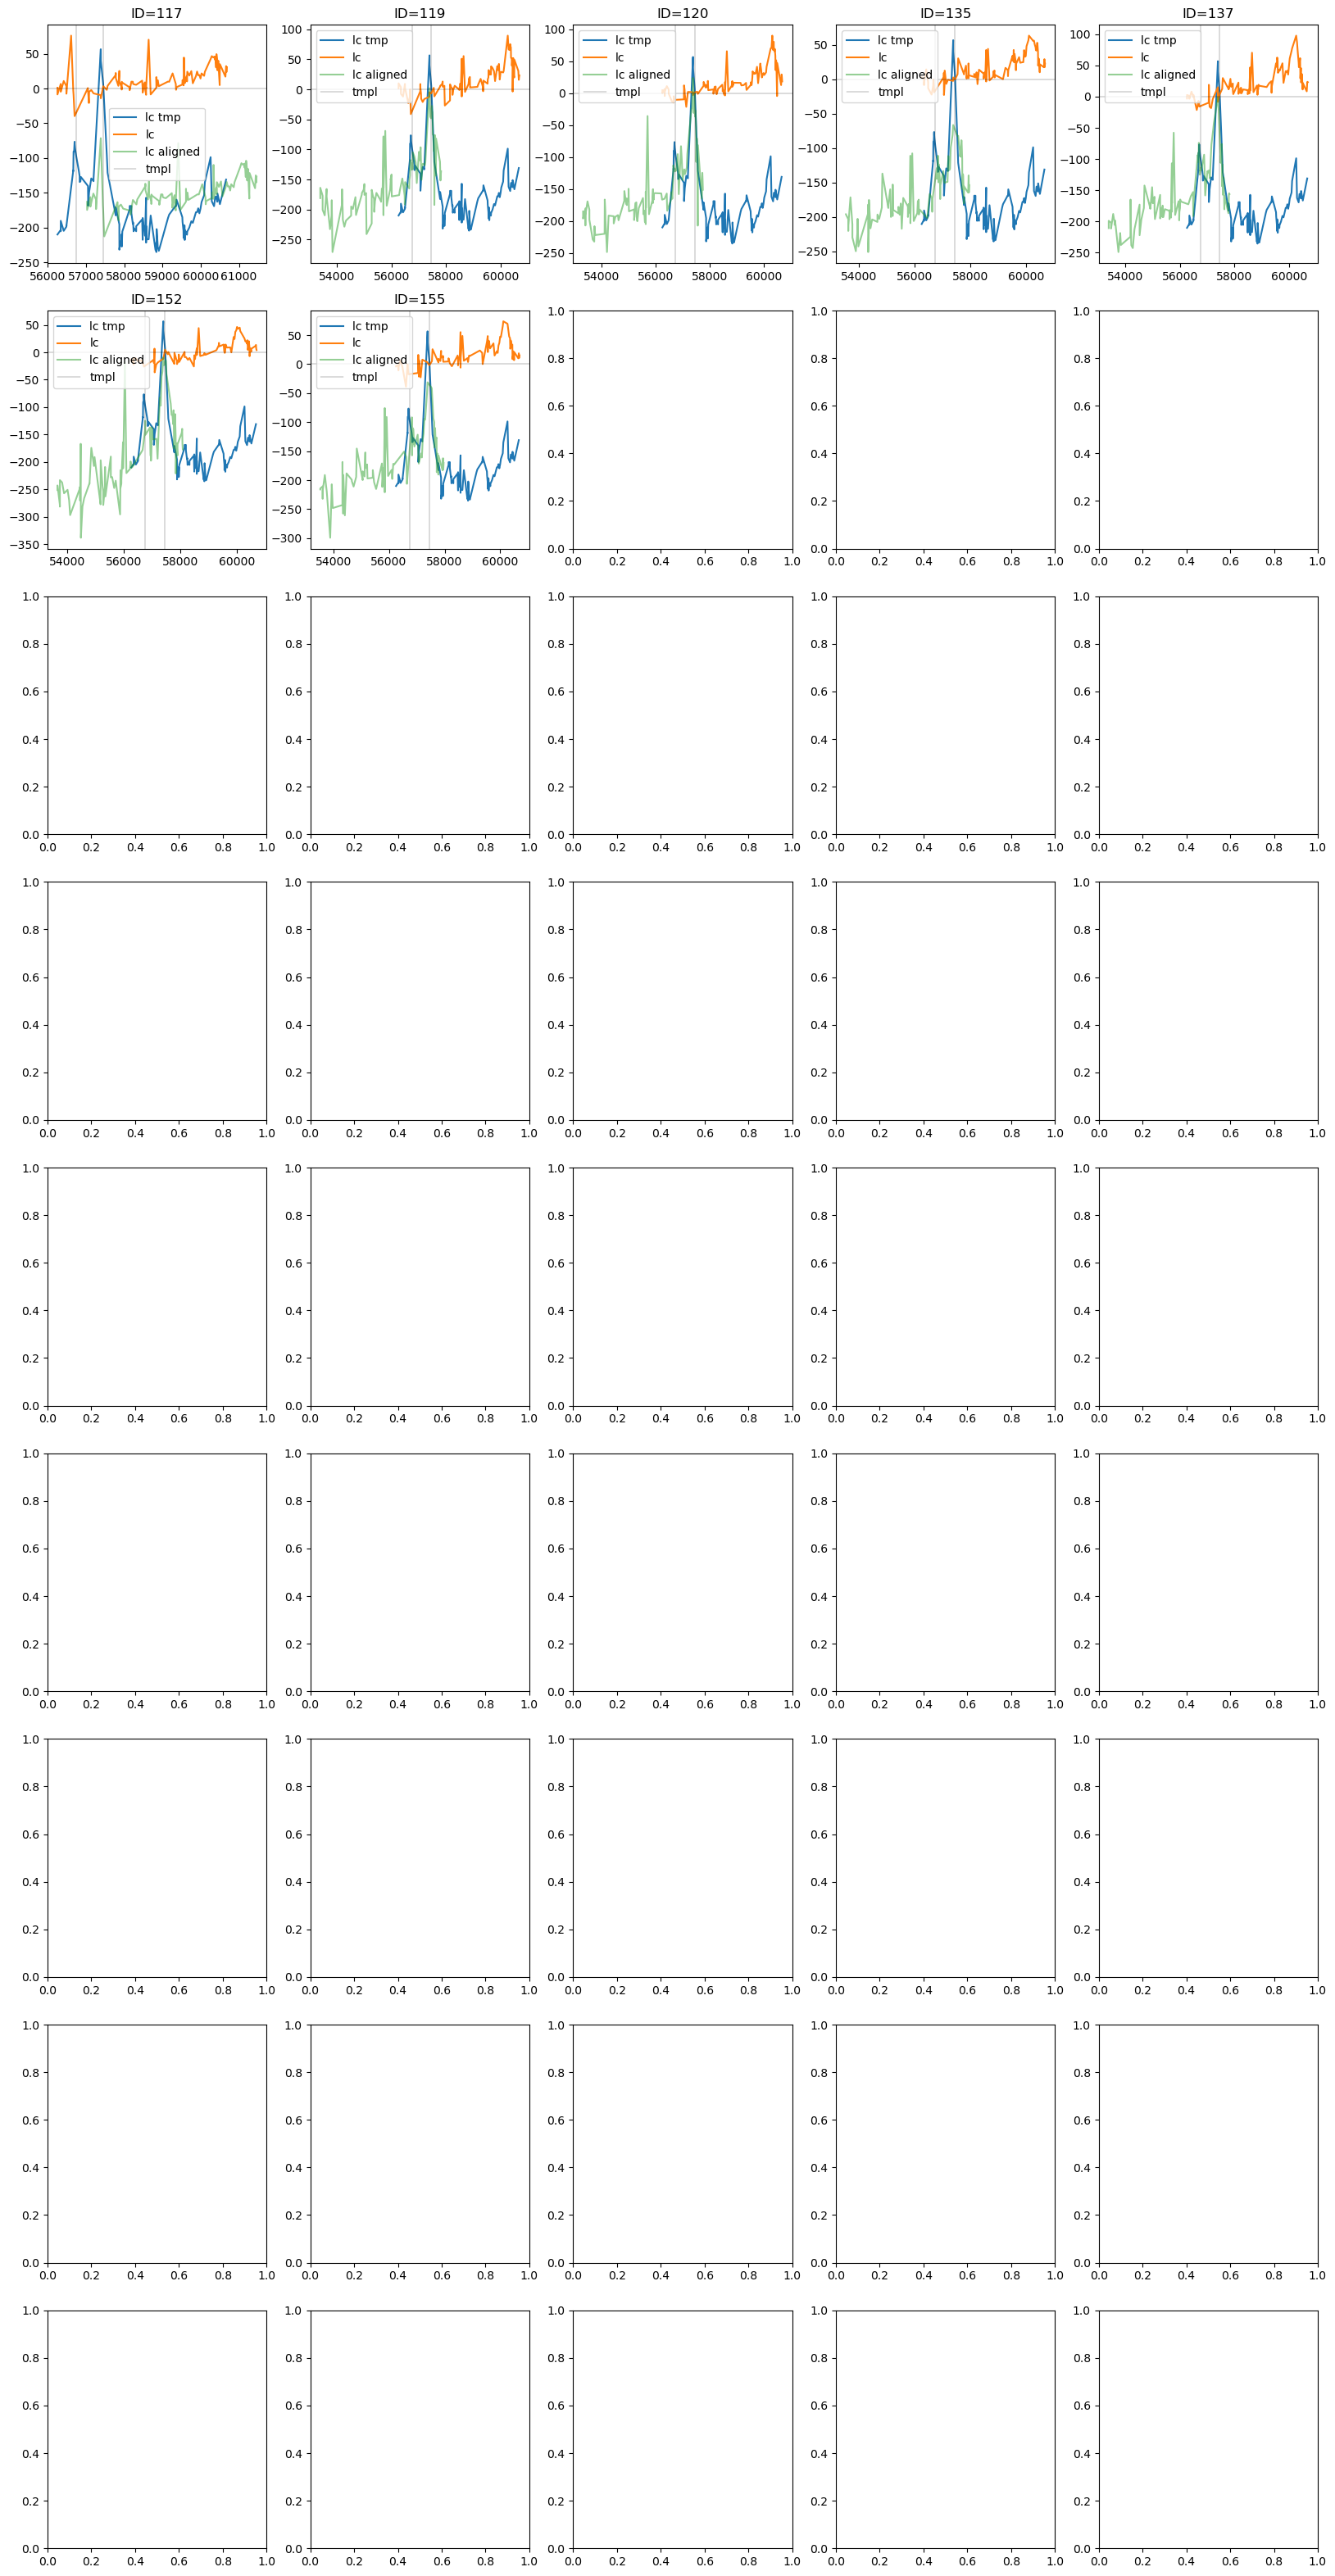

In [44]:
Id = 19
dic_df = dic_df_poly1

df = dic_df[Id]
idx = ( df.good ) & (df['fluxADU']<1000)
t1 = df[idx]['mjd'].values
#f1 = df[idx]['Jyas2'].values
f1 = df[idx]['fluxADU'].values

fig, axs = plt.subplots(9, 5, figsize=(20, 40))
axs = axs.flatten() 

tshifts = []
a_norms = []
b_offsets = []

heights = []

posx = []
posy = []

dic_df = dic_df_57
for i, Id in enumerate(IDs_good_fits_57):
    
    #Id = 12
    df = dic_df[Id]
    
    posx.append(df['x'].values[0])
    posy.append(df['y'].values[0])
    
    
    idx = df.good
    t2 = df[idx]['mjd'].values
    #f2 = df[idx]['Jyas2'].values
    f2 = df[idx]['fluxADU'].values
    
    tshift, a, b = get_tshift_scale_offset(t1, f1, t2, f2)

    tshifts.append(tshift)
    a_norms.append(a)
    b_offsets.append(b)

    height = np.sort(f2)[-10:].mean() - np.sort(f2)[:10].mean()
    heights.append(height)
    
    ax = axs[i]
    ax.plot(t1, f1, label='lc tmp')
    ax.plot(t2, f2, label='lc')
    ax.plot(t2-tshift, f2*a + b, alpha=.5, label='lc aligned')

    #-------
    ax.axvline(x=57452, color='k', linewidth=.2)
    ax.axvline(x=56745, color='k', linewidth=.2, label='tmpl')
    ax.axhline(y=0, color='k', linewidth=.2)

    
    ax.legend()
    ax.set_title(f'ID={Id}')
    print(Id)


In [232]:
IDs_good_fits_57

[117, 118, 119, 120, 135, 136, 137, 152, 154, 155, 171, 188, 205, 206, 207]

In [42]:
IDs_good_fits_57 = [117, 119, 120, 135, 137, 152, 155]

In [45]:
df_good_fits = pd.DataFrame()
df_good_fits['ID'] = IDs_good_fits_57
df_good_fits['x'] = posx
df_good_fits['y'] = posy
df_good_fits['RA'] = wcs57.pixel_to_world(posx, posy).ra.deg
df_good_fits['Dec'] = wcs57.pixel_to_world(posx, posy).dec.deg

# values from template

df_good_fits['tshift'] = tshifts
df_good_fits['a_norm'] = a_norms
df_good_fits['b_offset'] = b_offsets

df_good_fits['height'] = heights


In [46]:
df_good_fits['flux_ctio'] = img57_tmpl[posy, posx].astype(np.int32)
df_good_fits['flux_ctio_mean'] = get_mean_pix(img57_tmpl, df_good_fits['x'], df_good_fits['y'])

df_good_fits['flux_spitzer'] = img_spitzer_proj57[posy, posx].astype(np.float32)
df_good_fits['flux_spitzer_mean'] = get_mean_pix(img_spitzer_proj57, df_good_fits['x'], df_good_fits['y'])

df_good_fits57 = df_good_fits.copy()


In [392]:
df_good_fits57

ID     x     y          RA        Dec       tshift    a_norm    b_offset  \
0  117  2046  2316  161.015727 -60.356118  -775.033503  1.221176 -164.519414   
1  119  2076  2316  161.011178 -60.356119  2872.014989  2.087174 -184.983137   
2  120  2091  2316  161.008903 -60.356120  2931.864391  2.446196 -196.440925   
3  135  2046  2331  161.015726 -60.354993  2721.654808  2.140976 -201.860351   
4  137  2076  2331  161.011177 -60.354994  2872.014989  2.084175 -204.305716   
5  152  2031  2346  161.017999 -60.353867  2608.020951  3.967015 -193.736886   
6  155  2076  2346  161.011176 -60.353869  2721.654808  2.375715 -206.906314   

   height  flux_ctio  flux_ctio_mean  flux_spitzer  flux_spitzer_mean  
0  64.501        924      940.111084     35.008259          35.032516  
1  84.958       1033     1030.222168     39.668743          39.659103  
2  81.595        980      975.777771     39.620476          39.538048  
3  64.873        945      956.777771     37.429310          37.452717  
4  84.057        946      962.444458     42.036575          41.979507  
5  60.987        984     1002.555542     39.421265          39.436028  
6  70.858        971      955.000000     40.140396          40.079105

### comet

In [48]:
IDs_comet = IDs_comet_poly1
dic_df_comet = dic_df_poly1

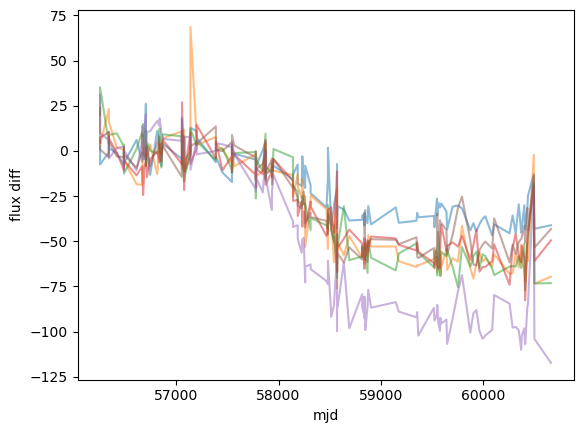

In [50]:
posx = []
posy = []

a_norms = []
heights = []
for i in IDs_comet[:]:
    df = dic_df_comet[i]

    posx.append(df['x'][0])
    posy.append(df['y'][0])


    t = df[df.good].mjd
    f = df[df.good].fluxADU
    

    height = f[:10].mean() - f[-30:].mean()
    heights.append(height)
    a_norms.append( 1/height )

    plt.plot(t, f, alpha=.5)
    plt.xlabel('mjd')
    plt.ylabel('flux diff')
    

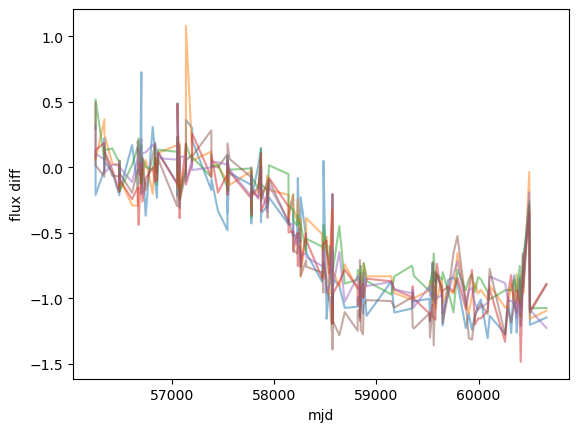

In [52]:
posx = []
posy = []

a_norms = []
heights = []
for i in IDs_comet_poly1[:]:
    df = dic_df_poly1[i]
    df = dic_df_poly1[i]

    posx.append(df['x'][0])
    posy.append(df['y'][0])


    t = df[df.good].mjd
    f = df[df.good].fluxADU
    

    height = f[:10].mean() - f[-30:].mean()
    heights.append(height)
    a_norms.append( 1/height )

    plt.plot(t, f /height, alpha=.5)
    plt.xlabel('mjd')
    plt.ylabel('flux diff')
    

In [54]:
"""

F_comet_diff = []
F_comet = []

T_comet = []

dic_lc = {}
for j, i in enumerate(IDs_comet[:]):
    df = dic_df_comet[i]
    t = df[df.good].mjd.values
    f = df[df.good].fluxADU.values
    f_tmpl = df_good_fits_comet[df_good_fits_comet['ID']==i]['flux_ctio_mean'].values

    T_comet.append(t)
    F_comet_diff.append(f)
    F_comet.append(f + f_tmpl)

    dic_lc[i] = f + f_tmpl
    plt.plot(t, (f + f_tmpl - 1573 ) * np.max(heights)/heights[j])
    
    plt.xlabel('mjd')
    plt.ylabel('flux')

"""

"\n\nF_comet_diff = []\nF_comet = []\n\nT_comet = []\n\ndic_lc = {}\nfor j, i in enumerate(IDs_comet[:]):\n    df = dic_df_comet[i]\n    t = df[df.good].mjd.values\n    f = df[df.good].fluxADU.values\n    f_tmpl = df_good_fits_comet[df_good_fits_comet['ID']==i]['flux_ctio_mean'].values\n\n    T_comet.append(t)\n    F_comet_diff.append(f)\n    F_comet.append(f + f_tmpl)\n\n    dic_lc[i] = f + f_tmpl\n    plt.plot(t, (f + f_tmpl - 1573 ) * np.max(heights)/heights[j])\n    \n    plt.xlabel('mjd')\n    plt.ylabel('flux')\n\n"

In [55]:
df_good_fits = pd.DataFrame()
df_good_fits['ID'] = IDs_comet
df_good_fits['x'] = posx
df_good_fits['y'] = posy
df_good_fits['RA'] = wcs54.pixel_to_world(posx, posy).ra.deg
df_good_fits['Dec'] = wcs54.pixel_to_world(posx, posy).dec.deg

# --------------
#df_good_fits['tshift'] = tshifts
df_good_fits['a_norm'] = a_norms
#df_good_fits['b_offset'] = b_offsets
df_good_fits['height'] = heights

# values from template
df_good_fits['flux_ctio'] = img54_tmpl[posy, posx].astype(np.int32)
df_good_fits['flux_ctio_mean'] = get_mean_pix(img54_tmpl, df_good_fits['x'], df_good_fits['y'])

df_good_fits['flux_spitzer'] = img_spitzer_proj54[posy, posx].astype(np.float32)
df_good_fits['flux_spitzer_mean'] = get_mean_pix(img_spitzer_proj54, df_good_fits['x'], df_good_fits['y'])

df_good_fits_comet = df_good_fits.copy()


In [54]:
df_good_fits54['region'] = 54
df_good_fits57['region'] = 57
df_good_fits_comet['region'] = '54comet'

In [396]:
df_good_fits_all_g = pd.concat([df_good_fits54, df_good_fits57, ]) # df_good_fits_comet])



In [397]:
df_good_fits_all_g.to_csv('df_good_fits_all_g.csv')

### aligned

In [56]:
df_good_fits54[df_good_fits54['ID']==19]

ID     x    y          RA        Dec  tshift    a_norm  b_offset  \
4  19  4116  816  161.018014 -60.309978     0.0  0.956874 -7.748891   

       height  flux_ctio  flux_ctio_mean  flux_spitzer  flux_spitzer_mean  
4  115.042767       1848     1858.555542     47.089825          47.110317

In [92]:
df_good_fits54['height'].max()

925.5491086956521

In [94]:
IDs_good_fits_poly1[:5]

[12, 13, 17, 18, 19]

In [57]:
len(IDs_good_fits_poly1)

35

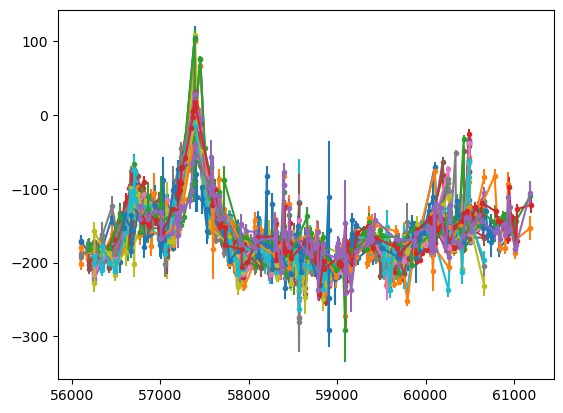

In [58]:
T_master_54 = []
F_master_54 = []
F_master_err_54 = []

for Id in IDs_good_fits_poly1[:38]:
    df = dic_df_poly1[Id]

    idx = ( df.good ) & (df['fluxADU']<1000)

    t = df[idx]['mjd'].values
    #f2 = df[idx]['Jyas2'].values
    f = df[idx]['fluxADU'].values
    f_err = df[idx]['flux_err'].values

    df_fits_param = df_good_fits54[df_good_fits54['ID']==Id]
    tshift = df_fits_param['tshift'].values
    a = df_fits_param['a_norm'].values
    b = df_fits_param['b_offset'].values

    height_max = df_good_fits54['height'].max()
    height = df_fits_param['height'].values
    flux_ctio = df_fits_param['flux_ctio'].values

    a_height = height_max / height
    
    #plt.errorbar(t-tshift, a_height*(f+flux_ctio-1553), a_height*f_err, fmt='.-', alpha=1, label='lc')
    plt.errorbar(t-tshift, f*a + b, f_err*a, fmt='.-', alpha=1, label='lc aligned')

    T_master_54.append(t-tshift)
    #F_master_54.append(a_height*(f+flux_ctio-1553))
    F_master_54.append(f*a + b)
    
    F_master_err_54.append(a*f_err)

    #plt.plot(t, f)

In [59]:
T_master_54 = np.concatenate(T_master_54)
F_master_54 = np.concatenate(F_master_54)
F_master_err_54 = np.concatenate(F_master_err_54)

idx = np.argsort(T_master_54)
T_master_54 = T_master_54[idx]
F_master_54 = F_master_54[idx]
F_master_err_54 = F_master_err_54[idx]


In [60]:
F_54_smooth = gaussian_filter1d(F_master_54, sigma=20)

<ErrorbarContainer object of 3 artists>

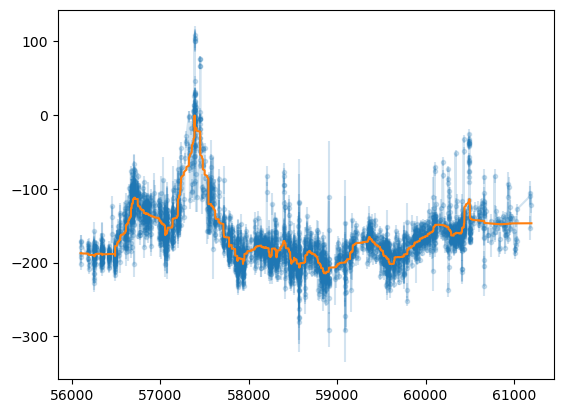

In [61]:
plt.errorbar(T_master_54, F_master_54, F_master_err_54, fmt='.-', alpha=0.2)
plt.errorbar(T_master_54, F_54_smooth)



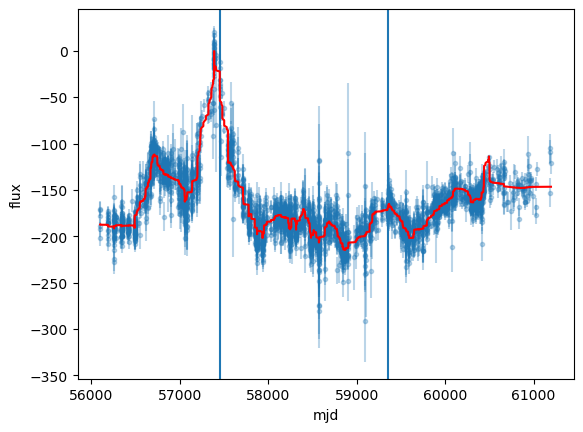

In [62]:
idx1 = F_54_smooth < (F_master_54 - 3*F_master_err_54) 
idx2 = F_54_smooth > (F_master_54 + 3*F_master_err_54) 

idx = idx1 + idx2
#plt.errorbar(T_master_54[idx], F_master_54[idx], F_master_err_54[idx], fmt='.', alpha=.3, c='tab:orange')

T_master_54_cliped = T_master_54[~idx]

F_master_54_cliped = F_master_54[~idx]

F_master_err_54_cliped = F_master_err_54[~idx]

plt.errorbar(T_master_54_cliped, F_master_54_cliped, F_master_err_54_cliped, fmt='.', alpha=.3, c='tab:blue')

plt.errorbar(T_master_54, F_54_smooth, alpha=1, color='r')

#plt.plot(T_master_57, F_57_smooth)
plt.xlabel('mjd')
plt.ylabel('flux')

plt.axvline(57456,)
plt.axvline(57456+1900)

In [467]:
1900/365

5.205479452054795

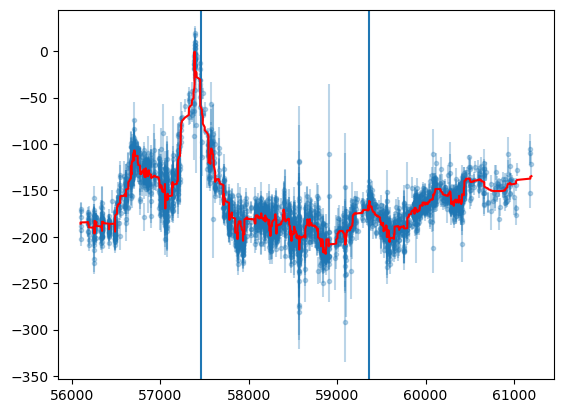

In [63]:
plt.errorbar(T_master_54_cliped, F_master_54_cliped, F_master_err_54_cliped, fmt='.', alpha=.3, c='tab:blue')

plt.errorbar(T_master_54_cliped, gaussian_filter1d(F_master_54_cliped, sigma=5), alpha=1, color='r')

plt.axvline(57456)
plt.axvline(57456+1900)

In [64]:
IDs_good_fits_57

[117, 119, 120, 135, 137, 152, 155]

In [ ]:
[119, 152, 171, 188, 206, ]

In [265]:
IDs_good_fits_57

[117, 119, 120, 135, 137, 152, 155]

Text(0.5, 0, 'flux')

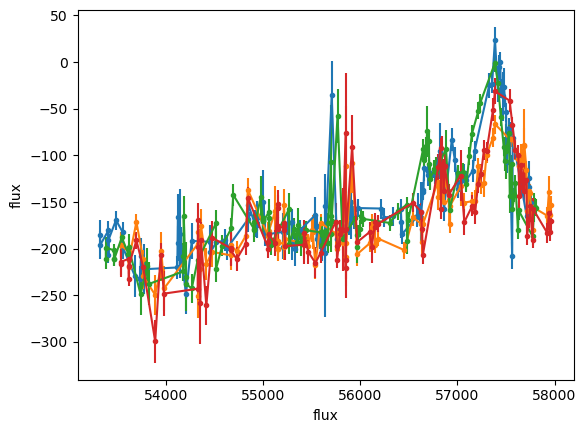

In [65]:
T_master_57 = []
F_master_57 = []
F_master_err_57 = []

for Id in IDs_good_fits_57:

    if Id in [ 120, 135, 136, 137, 154, 155,]:

        df = dic_df_57[Id]
    
        idx = ( df.good ) & (df['fluxADU']<1000)

        t = df[idx]['mjd'].values
        #f2 = df[idx]['Jyas2'].values
        f = df[idx]['fluxADU'].values
        f_err = df[idx]['flux_err'].values
    
        df_fits_param = df_good_fits57[df_good_fits57['ID']==Id]
        tshift = df_fits_param['tshift'].values
        a = df_fits_param['a_norm'].values
        b = df_fits_param['b_offset'].values
    
        height_max = df_good_fits57['height'].max()
        height = df_fits_param['height'].values
        flux_ctio = df_fits_param['flux_ctio_mean'].values

        a_height = height_max/height
        plt.errorbar(t-tshift, a*(f) + b, a*f_err, fmt='.-', alpha=1, label='lc')
        #plt.errorbar(t-tshift, f*a + b, f_err*a, fmt='.-', alpha=1, label='lc aligned')
        
        T_master_57.append(t-tshift)
        F_master_57.append(a*(f) + b)

        #F_master_57.append(f*a + b)
        
        F_master_err_57.append(a*f_err)

        #plt.plot(t, f)

plt.ylabel('flux')
plt.xlabel('flux')

In [66]:
T_master_57 = np.concatenate(T_master_57)
F_master_57 = np.concatenate(F_master_57)
F_master_err_57 = np.concatenate(F_master_err_57)

idx = np.argsort(T_master_57)
T_master_57 = T_master_57[idx]
F_master_57 = F_master_57[idx]
F_master_err_57 = F_master_err_57[idx]


<ErrorbarContainer object of 3 artists>

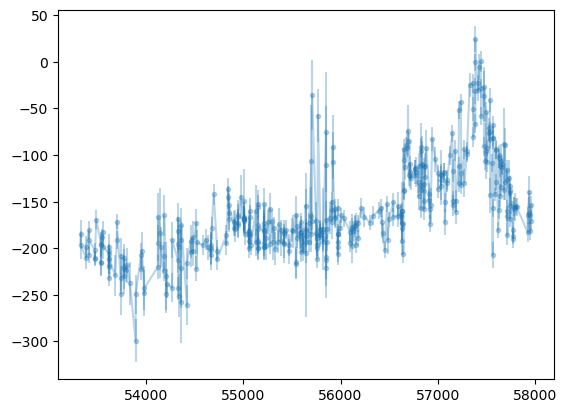

In [67]:
plt.errorbar(T_master_57, F_master_57, F_master_err_57, fmt='.-', alpha=.3, )

<ErrorbarContainer object of 3 artists>

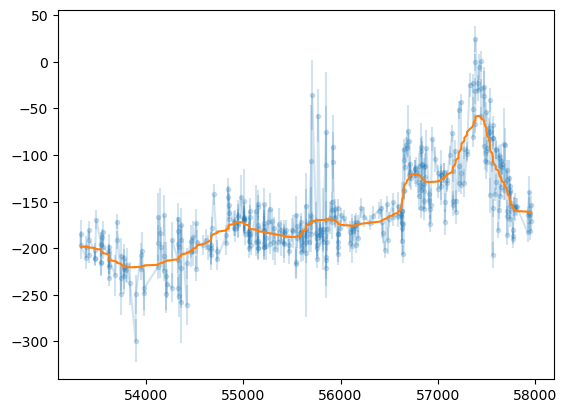

In [68]:
F_57_smooth = gaussian_filter1d(F_master_57, sigma=10)

plt.errorbar(T_master_57, F_master_57, F_master_err_57, fmt='.-', alpha=.2, )
plt.errorbar(T_master_57, F_57_smooth, alpha=1)

In [264]:
idx + idx

array([ True, False, False, ..., False, False, False])

Text(0, 0.5, 'flux')

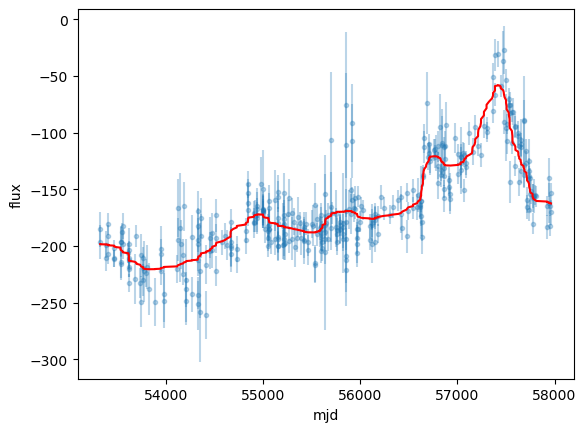

In [69]:
idx1 = F_57_smooth < (F_master_57 - 3*F_master_err_57) 
idx2 = F_57_smooth > (F_master_57 + 3*F_master_err_57) 

idx = idx1 + idx2
#plt.errorbar(T_master_57[idx], F_master_57[idx], F_master_err_57[idx], fmt='.', alpha=.3, c='tab:orange')
#plt.errorbar(T_master_57[~idx], F_master_57[~idx], F_master_err_57[~idx], fmt='.', alpha=.3, c='tab:blue')

T_master_57_cliped = T_master_57[~idx]
F_master_57_cliped = F_master_57[~idx]
F_master_err_57_cliped = F_master_err_57[~idx]

plt.errorbar(T_master_57_cliped, F_master_57_cliped, F_master_err_57_cliped, fmt='.', alpha=.3, c='tab:blue')
plt.errorbar(T_master_57, F_57_smooth, alpha=1, color='r')


#plt.errorbar(T_master_57, F_57_smooth, alpha=1, color='r')

#plt.plot(T_master_57, F_57_smooth)
plt.xlabel('mjd')
plt.ylabel('flux')

In [127]:
df_fits_param

ID     x     y          RA        Dec    a_norm   height  flux_ctio  \
0  236  3461  1467  161.117457 -60.261322  0.008441  118.466       1709   

   flux_ctio_mean  flux_spitzer  flux_spitzer_mean   region  
0     1693.888916     63.664967          63.487202  54comet

### align comet

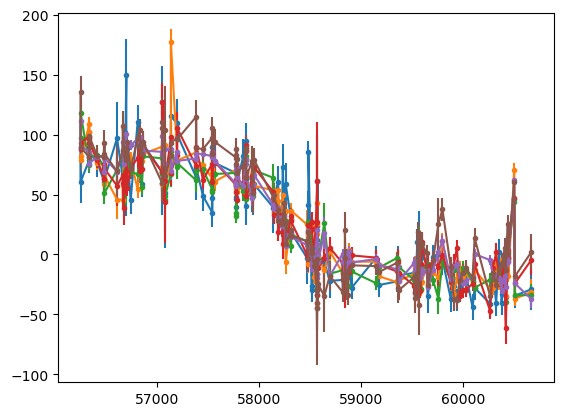

In [70]:
T_master_comet = []
F_master_comet = []
F_master_err_comet = []

for Id in IDs_comet:

    df = dic_df_comet[Id]

    idx = df.good
    t = df[idx]['mjd'].values
    #f2 = df[idx]['Jyas2'].values
    f = df[idx]['fluxADU'].values
    f_err = df[idx]['flux_err'].values

    df_fits_param = df_good_fits_comet[df_good_fits_comet['ID']==Id]
    tshift = 0#df_fits_param['tshift'].values
    a = df_fits_param['a_norm'].values
    b = 0 #df_fits_param['b_offset'].values

    height_max = df_good_fits_comet['height'].max()
    height = df_fits_param['height'].values
    flux_ctio = df_fits_param['flux_ctio_mean'].values

    a_height = height_max/height # normalize to highest light curve

    f_scaled = a_height*(f+flux_ctio-1573)
    f_aligned = f_scaled - f_scaled[-80:].mean()
    
    plt.errorbar(t-tshift,  f_aligned, a_height*f_err, fmt='.-', alpha=1, label='lc')
    #plt.errorbar(t-tshift, f*a + b, f_err*a, fmt='.-', alpha=1, label='lc aligned')

    #plt.plot(t, f)

    T_master_comet.append(t-tshift)
    F_master_comet.append(f_aligned)
    F_master_err_comet.append(a_height*f_err)
    



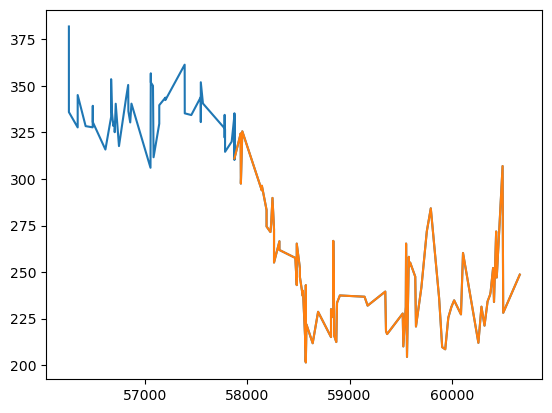

In [71]:
plt.plot(t, f_scaled)
plt.plot(t[-80:], f_scaled[-80:])


In [72]:
T_master_comet = np.concatenate(T_master_comet)
F_master_comet = np.concatenate(F_master_comet)
F_master_err_comet = np.concatenate(F_master_err_comet)

idx = np.argsort(T_master_comet)
T_master_comet = T_master_comet[idx]
F_master_comet = F_master_comet[idx]
F_master_err_comet = F_master_err_comet[idx]



In [73]:
F_comet_smooth = gaussian_filter1d(F_master_comet, sigma=30)


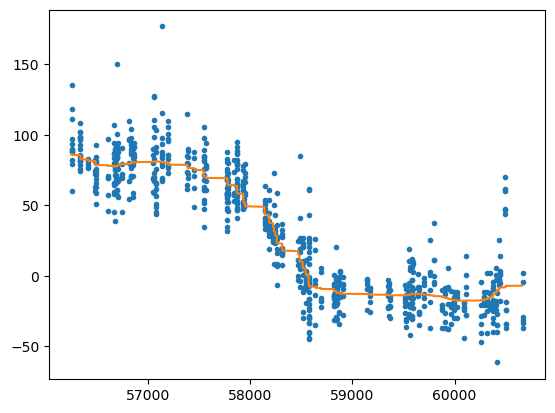

In [74]:
plt.plot(T_master_comet, F_master_comet, '.')
plt.plot(T_master_comet, F_comet_smooth)

Text(0, 0.5, 'flux')

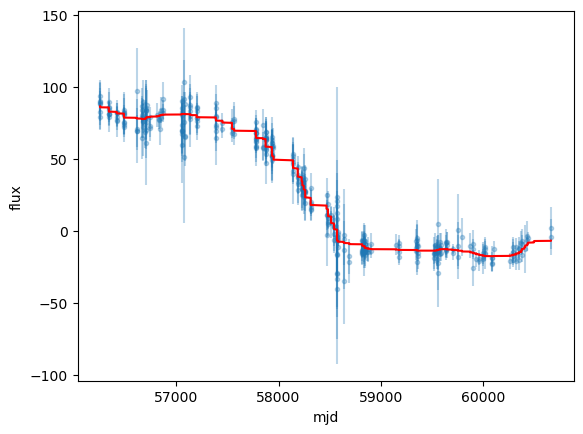

In [75]:
idx1 = F_comet_smooth < (F_master_comet - 1*F_master_err_comet) 
idx2 = F_comet_smooth > (F_master_comet + 1*F_master_err_comet) 

idx = idx1 + idx2
#plt.errorbar(T_master_comet[idx], F_master_comet[idx], F_master_err_comet[idx], fmt='.', alpha=.3, c='tab:orange')
#plt.errorbar(T_master_comet[~idx], F_master_comet[~idx], F_master_err_comet[~idx], fmt='.', alpha=.3, c='tab:blue')

#plt.errorbar(T_master_comet, F_comet_smooth, alpha=1, color='r')

#F_comet_smooth = gaussian_filter1d(F_master_comet[~idx], sigma=30)

T_master_comet_cliped = T_master_comet[~idx]
F_master_comet_cliped = F_master_comet[~idx]
F_master_err_comet_cliped = F_master_err_comet[~idx]

plt.errorbar(T_master_comet_cliped, F_master_comet_cliped, F_master_err_comet_cliped, fmt='.', alpha=.3, c='tab:blue')
plt.errorbar(T_master_comet, F_comet_smooth, alpha=1, color='r')

#plt.plot(T_master_57, F_57_smooth)
plt.xlabel('mjd')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

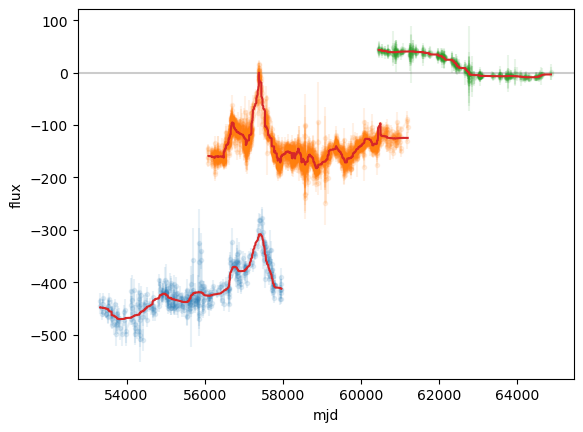

In [76]:

#plt.figure(figsize=(5, 6))
plt.errorbar(T_master_57_cliped, F_master_57_cliped-250, F_master_err_57_cliped, fmt='.-', alpha=.1, )
plt.errorbar(T_master_57, F_57_smooth-250, alpha=1, color='tab:red')

plt.errorbar(T_master_54_cliped, .85*F_master_54_cliped, F_master_err_54_cliped, fmt='.-', alpha=.1, )
plt.errorbar(T_master_54, .85*F_54_smooth, alpha=1, color='tab:red')

plt.errorbar(T_master_comet_cliped+4200, .5*F_master_comet_cliped, F_master_err_comet_cliped, fmt='.-', alpha=.1, )
plt.errorbar(T_master_comet+4200, .5*F_comet_smooth, alpha=1, color='tab:red')

plt.axhline(0, color='k', alpha=.2)

plt.xlabel('mjd')
plt.ylabel('flux')

#plt.ylim([-200, 2000])

#### Armin's pos

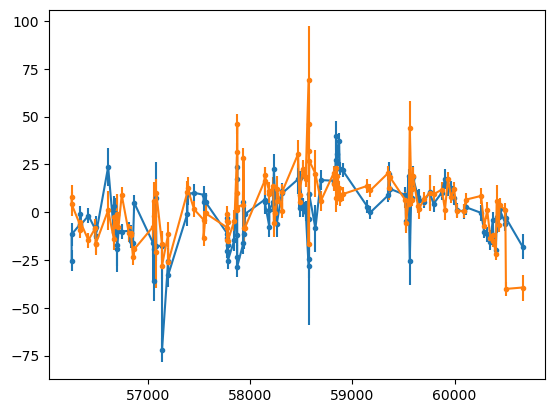

In [101]:

T_master_Arm = []
F_master_Arm = []
F_master_err_Arm = []

for i in [ 1, 2,]:

    df = dic_df_54_Arm[i]
    
    idx = df.good
    t = df[idx]['mjd'].values
    #f2 = df[idx]['Jyas2'].values
    f = df[idx]['fluxADU'].values
    f_err = df[idx]['flux_err'].values

    T_master_Arm.append(t)
    F_master_Arm.append(f)
    F_master_err_Arm.append(f_err)
    
    plt.errorbar(t,  f, f_err, fmt='.-', alpha=1, label='lc')



In [102]:
T_master_Arm = np.concatenate(T_master_Arm)
F_master_Arm = np.concatenate(F_master_Arm)
F_master_err_Arm = np.concatenate(F_master_err_Arm)

idx = np.argsort(T_master_Arm)
T_master_Arm = T_master_Arm[idx]
F_master_Arm = F_master_Arm[idx]
F_master_err_Arm = F_master_err_Arm[idx]


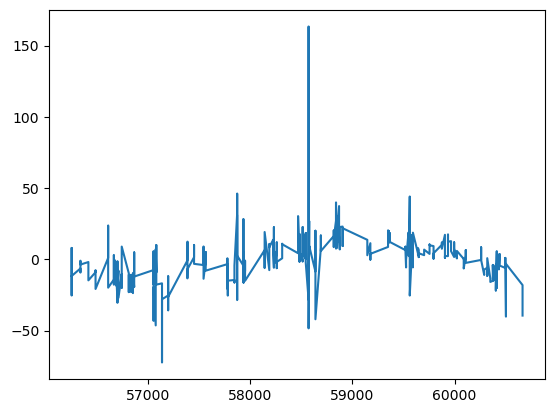

In [79]:
plt.plot(T_master_Arm, F_master_Arm)

#### combine all parts

Text(0, 0.5, 'flux')

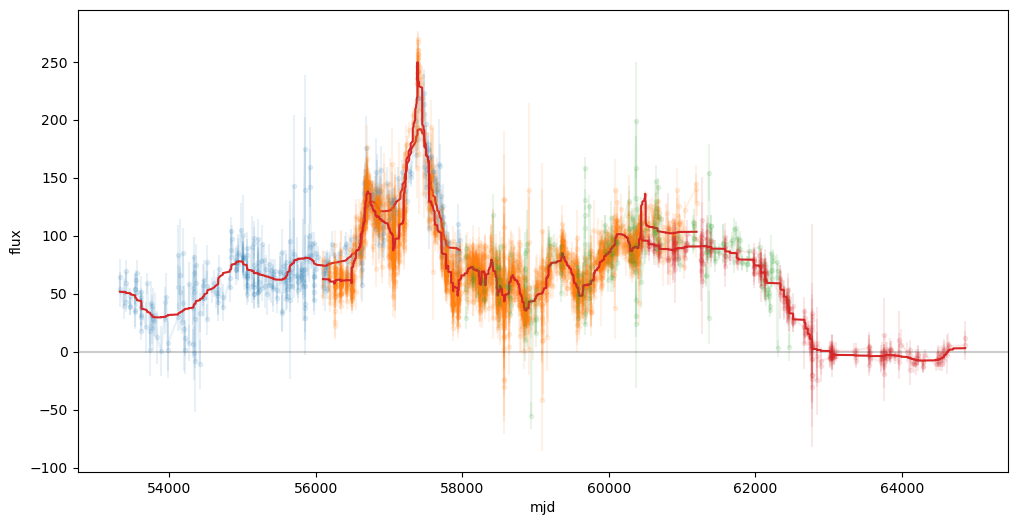

In [106]:

plt.figure(figsize=(12, 6))
f_offset_5457 = 250

plt.errorbar(T_master_57_cliped, F_master_57_cliped+f_offset_5457, F_master_err_57_cliped, fmt='.-', alpha=.1, )
plt.errorbar(T_master_57, F_57_smooth+f_offset_5457, alpha=1, color='tab:red')

plt.errorbar(T_master_54_cliped, 1*F_master_54_cliped+f_offset_5457, F_master_err_54_cliped, fmt='.-', alpha=.1, )
plt.errorbar(T_master_54, 1*F_54_smooth+f_offset_5457, alpha=1, color='tab:red')

# Armin's pos
plt.errorbar(T_master_Arm+1800, 1.8*F_master_Arm+75, 1.8*F_master_err_Arm, fmt='.-', alpha=.1)

# comet
plt.errorbar(T_master_comet_cliped+4200, 1.*F_master_comet_cliped+10, F_master_err_comet_cliped, fmt='.-', alpha=.1, )
plt.errorbar(T_master_comet+4200, 1.0*(F_comet_smooth+10), alpha=1, color='tab:red')


# 
plt.axhline(0, color='k', alpha=.2)

plt.xlabel('mjd')
plt.ylabel('flux')

#plt.ylim([-200, 2000])

In [109]:
T_all = np.concatenate([T_master_57_cliped, 
                        T_master_54_cliped, 
                        T_master_Arm+1800, 
                        T_master_comet_cliped+4200]) 

Region_all = np.concatenate([ ['57']*len(T_master_57_cliped), 
                        ['54']*len(T_master_54_cliped), 
                        ['middle']*len(T_master_Arm), 
                        ['comet']*len(T_master_comet_cliped)])

F_all =np.concatenate([F_master_57_cliped+f_offset_5457, 
                       1*F_master_54_cliped+f_offset_5457, 
                       1.8*F_master_Arm+75, F_master_comet_cliped+10])

F_all_err = np.concatenate([F_master_err_57_cliped, 
                            F_master_err_54_cliped, 
                            1.8*F_master_err_Arm, 
                            F_master_err_comet_cliped])


i_sort = np.argsort(T_all)

T_all = T_all[i_sort]
F_all = F_all[i_sort]
F_all_err = F_all_err[i_sort]
Region_all = Region_all[i_sort]



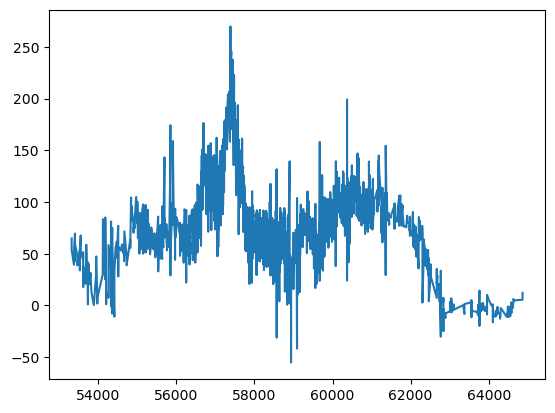

In [110]:
plt.plot(T_all, F_all)

In [111]:
df_g = pd.DataFrame()
df_g['mjd'] = T_all
df_g['fluxADU'] = F_all
df_g['flux_err'] = F_all_err
df_g['region'] = Region_all


In [112]:
df_g.to_csv('EtaCar_g.csv', index=False)

In [502]:
np.unique(dic_df_poly1[19]['zpt'])

array([30.469, 30.572, 30.605])

In [53]:
np.unique(dic_df_54_Arm[0] ['zpt'])

array([28.768, 30.469, 30.572, 30.605])

### flux to magnitude

In [21]:
df_g = pd.read_csv('EtaCar_g.csv')

df_i = pd.read_csv('EtaCar_i.csv')



In [54]:
mag_g = -2.5 * np.log10(df_g.fluxADU) + 30.4
mag_i = -2.5 * np.log10(df_i.fluxADU) + 30.2

/Users/home/miniconda3/envs/datasci/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [55]:
t = np.linspace(53400, 64600, 100);



In [56]:
df_g.mjd.shape, mag_g.shape

((4635,), (4635,))

In [57]:
mag_g = np.interp(t, df_g.mjd, mag_g)

mag_i = np.interp(t, df_i.mjd, mag_i)

In [58]:
mag_g.shape

(100,)

(32.0, 22.0)

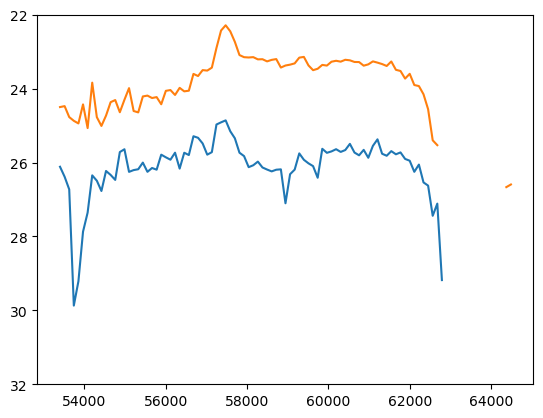

In [59]:
plt.plot(t, mag_g);
plt.plot(t, mag_i)
plt.ylim([32, 22])



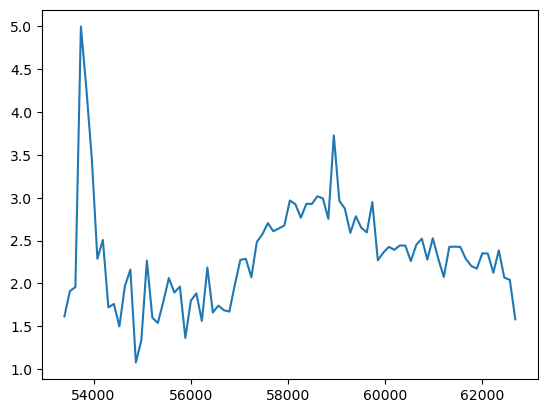

In [60]:
plt.plot(t, mag_g - mag_i);
#plt.ylim([32, 22])



### build model

In [ ]:
F_54_smooth = gaussian_filter1d(F_master_54, sigma=20)

In [579]:
lc_model = sp.interpolate.interp1d(T_all, gaussian_filter1d(F_all, sigma=20), kind='nearest', bounds_error=False, fill_value=0)
lc_model_i = sp.interpolate.interp1d(T_all_i, gaussian_filter1d(F_all_i, sigma=20), kind='nearest', bounds_error=False, fill_value=0)


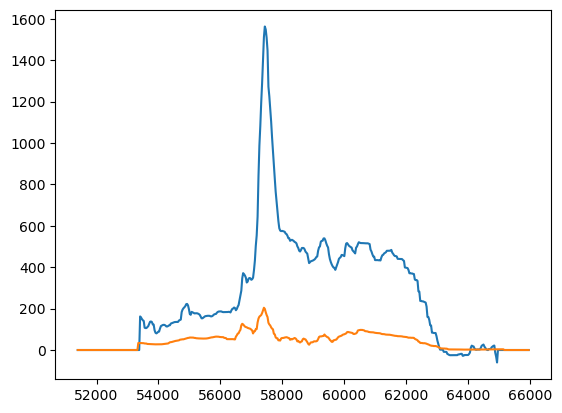

In [580]:
T_model = np.linspace(51394, 65960, 500)

F_model = lc_model(T_model)
F_model_i = lc_model_i(T_model)

plt.plot(T_model, F_model_i)

plt.plot(T_model, F_model)


In [ ]:
plt.plot()

In [559]:
dic_df_poly1[19].columns

Index(['ID', 'x', 'y', 'bsize', 'mjd', 'zpt', 'fluxADU', 'flux_err', 'X2norm',
       'Npix', 'Nmask', 'Jyas2', 'Jyas2_err', 'SB', 'SB_err', 'skip', 'imID',
       'filter', 'CONVOL00', 'PHOTNORM', 'KSUM00', 'FSIG00', 'FSCAT00', 'FWHM',
       'M5SIGMA', 'SKYADU', 'good'],
      dtype='object')

In [690]:
for di in IDs_good_:
    print(di, np.unique(dic_df_57[di]['zpt']))


117 [28.822 30.35  30.494 30.519 30.593 30.63  30.631 30.645]
119 [28.822 30.35  30.494 30.519 30.593 30.63  30.631 30.645]
120 [28.822 30.35  30.494 30.519 30.593 30.63  30.631 30.645]
135 [28.822 30.35  30.494 30.519 30.593 30.63  30.631 30.645]
137 [28.822 30.35  30.494 30.519 30.593 30.63  30.631 30.645]
152 [28.822 30.35  30.494 30.519 30.593 30.63  30.631 30.645]
155 [28.822 30.35  30.494 30.519 30.593 30.63  30.631 30.645]


In [562]:
dic_df_poly1[19][['mjd', 'fluxADU', 'Jyas2']]

mjd  fluxADU  Jyas2
0    56255.304405  -210.18 -6.799
2    56341.278127  -203.55 -6.584
3    56341.283970  -205.43 -6.645
4    56341.286605  -190.49 -6.162
5    56418.971400  -204.90 -6.628
..            ...      ...    ...
123  60403.044257  -155.69 -5.036
125  60433.031302  -162.97 -5.271
126  60439.030163  -151.18 -4.890
128  60502.002281  -166.50 -4.899
129  60664.306395  -131.02 -3.738

[116 rows x 3 columns]

In [563]:
-5.036 / -155.69	

0.032346329244010534

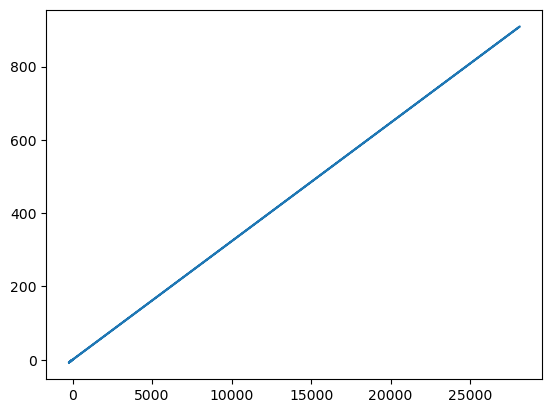

In [581]:
plt.plot(dic_df_poly1[19]['fluxADU'], dic_df_poly1[19]['Jyas2'])

In [558]:
dic_df_poly1[19]['fluxADU']

0      56255.304405
2      56341.278127
3      56341.283970
4      56341.286605
5      56418.971400
           ...     
123    60403.044257
125    60433.031302
126    60439.030163
128    60502.002281
129    60664.306395
Name: mjd, Length: 116, dtype: float64

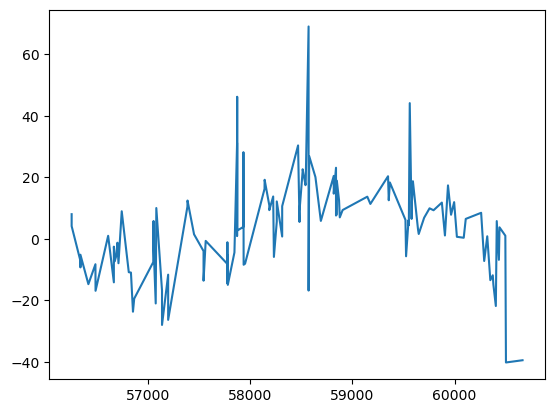

In [557]:
d

In [585]:
F_model_i.min()

-60.18908756619603

In [584]:
F_model.min()

0.0

Text(0, 0.5, 'flux')

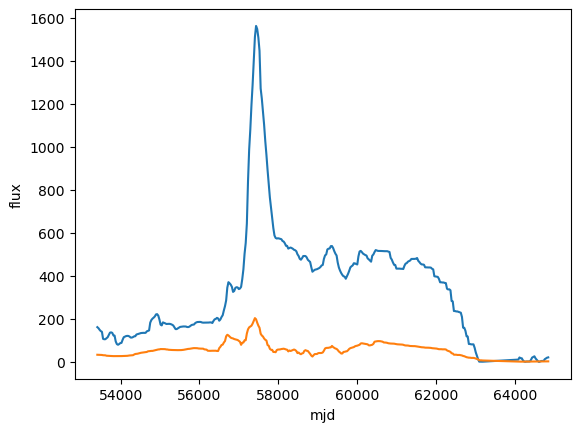

In [714]:
idx = ( F_model_i>0 ) & (F_model > 0)
T = T_model[idx]
F_g = F_model[idx]
F_i = F_model_i[idx]

plt.plot(T, F_i)

plt.plot(T, F_g)

plt.xlabel('mjd')
plt.ylabel('flux')

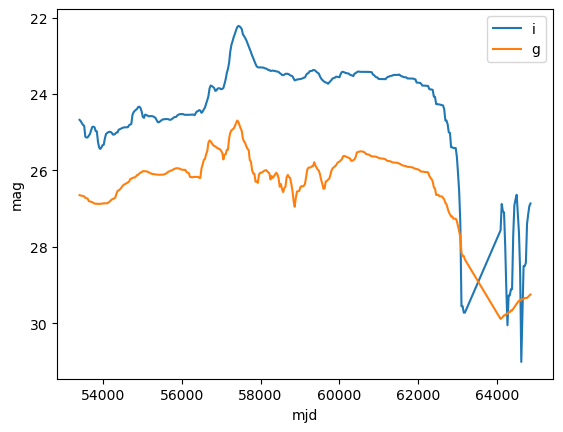

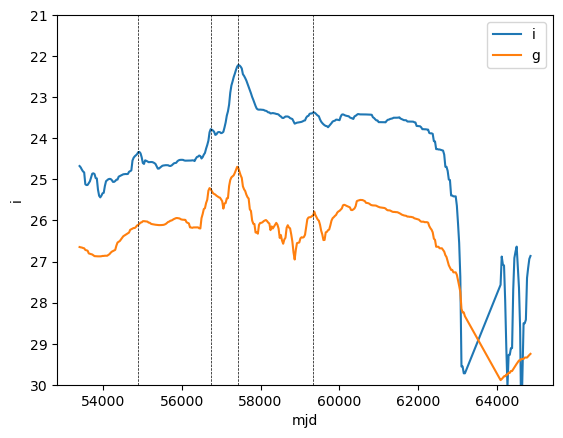

In [739]:

mag_i = -2.5*np.log10( F_i ) + 30.2
plt.plot(T, mag_i, label='i')
#plt.gca().invert_yaxis()

mag_g = -2.5*np.log10( (F_g ) ) +30.469 
plt.plot(T, mag_g, label='g')
plt.gca().invert_yaxis()
plt.legend()

#plt.ylim([30, 20])

plt.xlabel('mjd')
plt.ylabel('mag')


plt.figure()
plt.plot(T, mag_i, label='i')
plt.plot(T, mag_g, label='g')

plt.gca().invert_yaxis()
plt.ylim([30, 21])
plt.ylabel('i')
plt.xlabel('mjd')
plt.legend()

#plt.axvline(x=53400, color='k', lw=.5, ls='--')

plt.axvline(x=54900, color='k', lw=.5, ls='--')
plt.axvline(x=56750, color='k', lw=.5, ls='--')
plt.axvline(x=57430, color='k', lw=.5, ls='--')
plt.axvline(x=57430+1900, color='k', lw=.5, ls='--')




In [643]:
dic_df_poly1[19].columns

Index(['ID', 'x', 'y', 'bsize', 'mjd', 'zpt', 'fluxADU', 'flux_err', 'X2norm',
       'Npix', 'Nmask', 'Jyas2', 'Jyas2_err', 'SB', 'SB_err', 'skip', 'imID',
       'filter', 'CONVOL00', 'PHOTNORM', 'KSUM00', 'FSIG00', 'FSCAT00', 'FWHM',
       'M5SIGMA', 'SKYADU', 'good'],
      dtype='object')

In [732]:
np.unique( dic_df_poly1[1422] ['zpt'])

array([28.768, 30.469, 30.572, 30.605])

(0.0, 3.5)

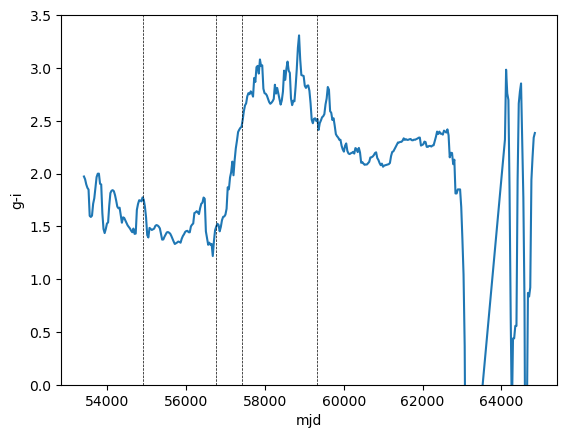

In [738]:


plt.figure()

plt.plot(T, mag_g - mag_i)

plt.ylabel('g-i')
plt.xlabel('mjd')


plt.axvline(x=54900, color='k', lw=.5, ls='--')
plt.axvline(x=56750, color='k', lw=.5, ls='--')
plt.axvline(x=57430, color='k', lw=.5, ls='--')
plt.axvline(x=57430+1900, color='k', lw=.5, ls='--')


plt.ylim([0, 3.5])


(28.0, 22.0)

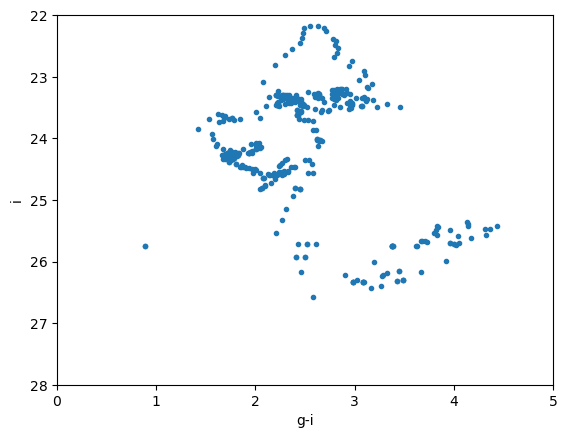

In [599]:
plt.plot(mag_g-mag_i, mag_i, '.')
plt.ylabel('i')
plt.xlabel('g-i')

plt.gca().invert_yaxis()

plt.xlim([0, 5])
plt.ylim([28, 22])

In [ ]:
idx = T_all[idx]



In [ ]:
plt.plot()

In [ ]:
lcs_all = {
    'T_master_54_cliped': T_master_54_cliped,
    'F_master_54_cliped': F_master_54_cliped,
    'T_master_57_cliped': T_master_57_cliped,
    'F_master_57_cliped': T_master_57_cliped,
    't_arm': t_arm+1950
    'f_arm': f_arm
    't_comet': t_comet
    'f_comet': f_comet

}

In [692]:
# comet
dic_df_poly1[1422]['zpt']

0      30.469
1      30.469
2      30.469
3      30.469
4      30.469
        ...  
125    30.469
126    30.469
127    28.768
128    30.572
129    30.605
Name: zpt, Length: 130, dtype: float64

Text(0, 0.5, 'flux')

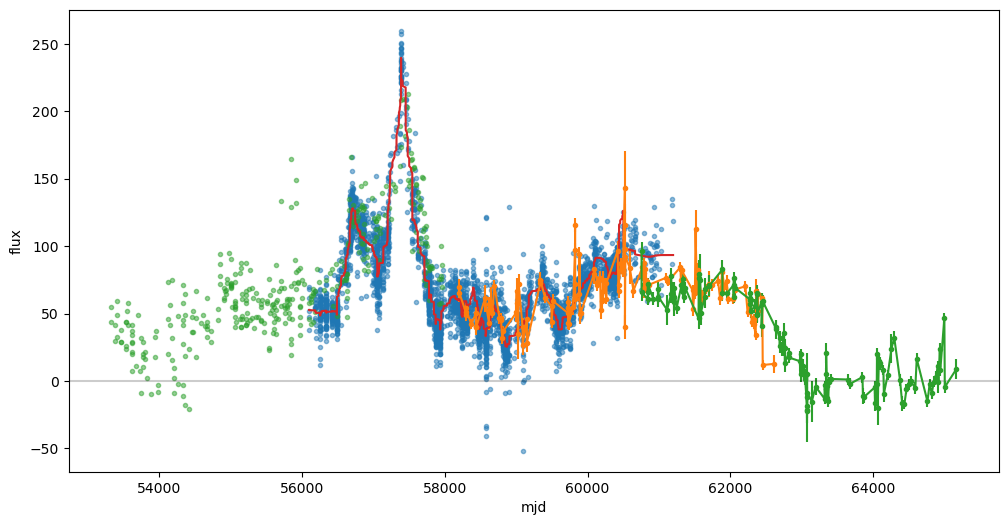

In [485]:

plt.figure(figsize=(12, 6))

f_offset = 240

plt.plot(T_master_54_cliped, F_master_54_cliped + f_offset, '.', color='tab:blue',alpha=0.5)

plt.plot(T_master_57_cliped, F_master_57_cliped + f_offset, '.', color='tab:green', alpha=.5)

#plt.errorbar(T_master_57_cliped, F_master_57_cliped + f_offset, F_master_err_57_cliped, fmt='.-', alpha=.1, )
#plt.errorbar(T_master_57, F_57_smooth + f_offset, alpha=1, color='tab:red')

#plt.errorbar(T_master_54_cliped, .85*F_master_54_cliped+f_offset, F_master_err_54_cliped, fmt='.-', alpha=.1, )
plt.errorbar(T_master_54, F_54_smooth + f_offset, alpha=1, color='tab:red')

#plt.errorbar(T_master_comet_cliped+4200, .5*F_master_comet_cliped, F_master_err_comet_cliped, fmt='.-', alpha=.1, )
#plt.errorbar(T_master_comet+4200, .5*F_comet_smooth, alpha=1, color='tab:red')

#--------- middle
Id = IDs_54_Arm[2]

#Id = 390
df = dic_df_54_Arm[Id] 

#t = df['mjd'].values
#f = df['Jyas2'].values
#f_err =  df['Jyas2_err'].values

#ax.errorbar(t, f, f_err, fmt='.')
idx = ( df.good ) & (df['fluxADU']<3000)
t_arm = df[idx]['mjd'].values
f_arm = df[idx]['fluxADU'].values
f_err_arm =  df[idx]['flux_err'].values
plt.errorbar(t_arm+1950, 1.2*(f_arm) +60 , f_err_arm, fmt='.-', alpha=1, color='tab:orange')


#--------- comet
Id = 1422

#Id = 390
df = dic_df_poly1[Id] 

#t = df['mjd'].values
#f = df['Jyas2'].values
#f_err =  df['Jyas2_err'].values

#ax.errorbar(t, f, f_err, fmt='.')
idx = ( df.good ) & (df['fluxADU']<3000)
t_comet = df[idx]['mjd'].values
f_comet = df[idx]['fluxADU'].values
f_err_comet =  df[idx]['flux_err'].values
plt.errorbar(t_comet+4500, 1.3*(f_comet+50), f_err, fmt='.-', alpha=1, color='tab:green')

#-----------------------------------

plt.axhline(0, color='k', alpha=.2)

plt.xlabel('mjd')
plt.ylabel('flux')

#plt.ylim([-200, 2000])



Text(0, 0.5, 'flux')

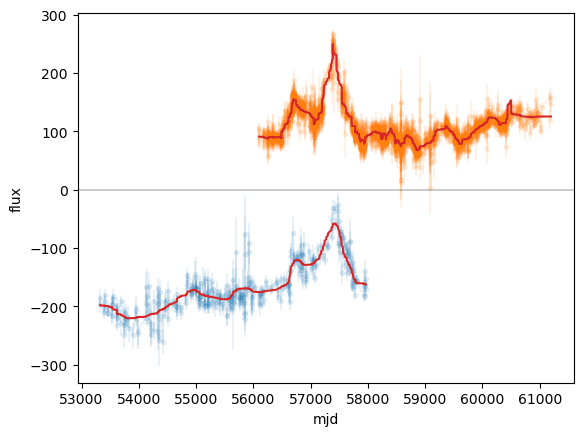

In [283]:

#plt.figure(figsize=(5, 6))
plt.errorbar(T_master_57_cliped, F_master_57_cliped, F_master_err_57_cliped, fmt='.-', alpha=.1, )
plt.errorbar(T_master_57, F_57_smooth, alpha=1, color='tab:red')

plt.errorbar(T_master_54_cliped, .85*F_master_54_cliped+250, F_master_err_54_cliped, fmt='.-', alpha=.1, )
plt.errorbar(T_master_54, .85*F_54_smooth+250, alpha=1, color='tab:red')

#plt.errorbar(T_master_comet_cliped+4200, 1.8*F_master_comet_cliped, F_master_err_comet_cliped, fmt='.-', alpha=.1, )
#plt.errorbar(T_master_comet+4200, 1.8*F_comet_smooth, alpha=1, color='tab:red')

plt.axhline(0, color='k', alpha=.2)

plt.xlabel('mjd')
plt.ylabel('flux')

#plt.ylim([-200, 2000])

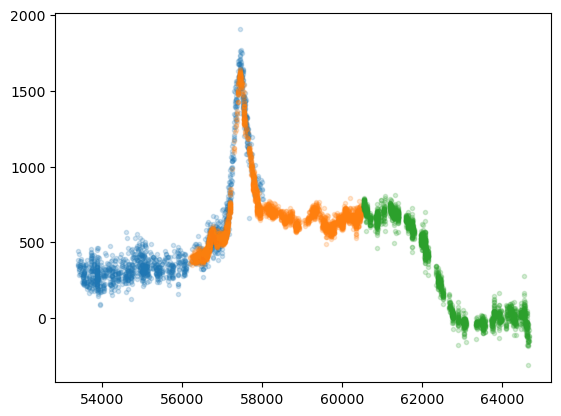

In [582]:
plt.plot(T_master_57_cliped, F_master_57_cliped, '.', alpha=.2)

plt.plot(T_master_54_cliped, .85*F_master_54_cliped+250, '.', alpha=.2)

plt.plot(T_master_comet_cliped+4200, 1.8*F_master_comet_cliped, '.', alpha=.2)



In [588]:

T_all = np.concatenate([T_master_57_cliped, T_master_54_cliped, T_master_comet_cliped+4200])
F_all = np.concatenate([F_master_57_cliped, .85*F_master_54_cliped+250,  1.8*F_master_comet_cliped])

i_sort = np.argsort(T_all)

T_all = T_all[i_sort]
F_all = F_all[i_sort]




Text(0, 0.5, 'flux')

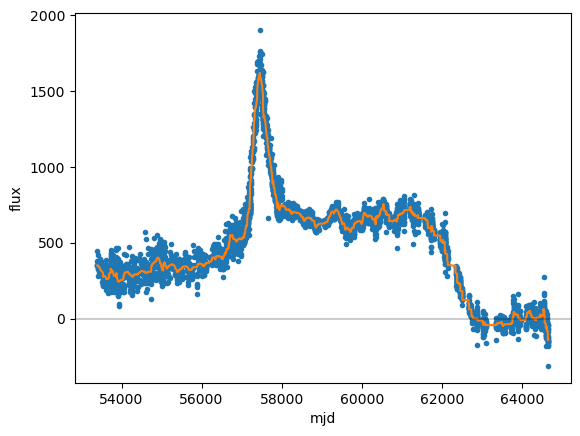

In [630]:
F_all_smooth = gaussian_filter1d(F_all, sigma=10)

plt.plot(T_all, F_all, '.')
plt.plot(T_all, F_all_smooth)

plt.axhline(0, color='k', alpha=.2)

plt.xlabel('mjd')
plt.ylabel('flux')



In [597]:
lc_model = sp.interpolate.interp1d(T_all, F_all_smooth, kind='nearest', bounds_error=False, fill_value=0)


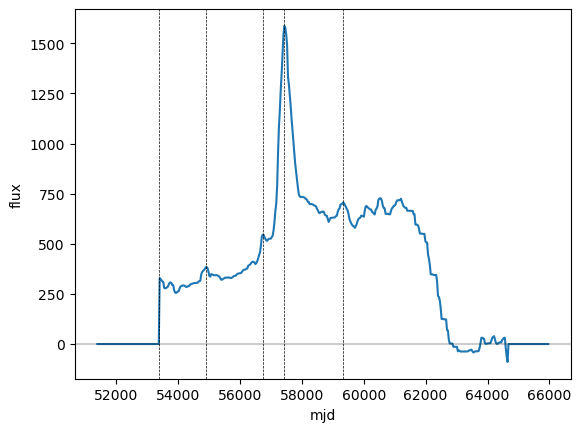

In [618]:
T_model = np.linspace(51394, 65960, 500)

F_model = lc_model(T_model)

plt.plot(T_model, F_model)

plt.xlabel('mjd')
plt.ylabel('flux')


plt.axvline(x=53400, color='k', lw=.5, ls='--')

plt.axvline(x=54900, color='k', lw=.5, ls='--')
plt.axvline(x=56750, color='k', lw=.5, ls='--')
plt.axvline(x=57430, color='k', lw=.5, ls='--')
plt.axvline(x=57430+1900, color='k', lw=.5, ls='--')

plt.axhline(0, color='k', alpha=.2)

#plt.xlim([54000, 58000])

In [639]:
dic_df_57[119]

ID     x     y  bsize           mjd    zpt  fluxADU  flux_err  X2norm  \
0    119  2076  2316      3  56341.211110  30.12     1.87      5.20    0.17   
1    119  2076  2316      3  56341.216066  30.12     5.50      5.03    1.52   
2    119  2076  2316      3  56341.219000  30.12    -1.48      5.07    1.74   
3    119  2076  2316      3  56343.220957  30.12     9.21      4.96    0.70   
4    119  2076  2316      3  56343.222439  30.12     2.77      5.34    0.98   
..   ...   ...   ...    ...           ...    ...      ...       ...     ...   
227  119  2076  2316      3  60433.047853  30.12   289.15      7.76    1.56   
228  119  2076  2316      3  60448.009484  30.12   283.26      8.67    1.42   
229  119  2076  2316      3  60449.048751  30.12   263.39      7.60    1.61   
230  119  2076  2316      3  60450.068074  30.12   288.09      8.56    0.67   
231  119  2076  2316      3  60460.091694  30.12   291.04      7.63    1.56   

     Npix  ...  filter  CONVOL00  PHOTNORM  KSUM00  FSIG00 FSCAT00   FWHM  \
0       9  ...       i  TEMPLATE         t  1.1161   1.441   0.137  3.834   
1       9  ...       i  TEMPLATE         t  1.1177   1.436   0.134  4.222   
2       9  ...       i  TEMPLATE         t  1.1188   1.436   0.143  3.981   
3       9  ...       i  TEMPLATE         t  1.1264   1.363   0.092  4.085   
4       9  ...       i  TEMPLATE         t  1.1262   1.426   0.128  4.061   
..    ...  ...     ...       ...       ...     ...     ...     ...    ...   
227     9  ...       i  TEMPLATE         t  1.0630   1.163   0.092  4.655   
228     9  ...       i  TEMPLATE         t  1.0478   1.199   0.119  4.922   
229     9  ...       i  TEMPLATE         t  1.0603   1.083   0.038  6.128   
230     9  ...       i  TEMPLATE         t  1.0228   1.187   0.105  3.787   
231     9  ...       i  TEMPLATE         t  1.0629   1.237   0.125  3.504   

    M5SIGMA  SKYADU  good  
0    23.216  1025.0  True  
1    23.151  1006.0  True  
2    23.186  1023.0  True  
3    23.083  1220.0  True  
4    23.063  1233.0  True  
..      ...     ...   ...  
227  22.528  1731.0  True  
228  22.244  2325.0  True  
229  22.148  2044.0  True  
230  22.427  2762.0  True  
231  22.717  2147.0  True  

[192 rows x 27 columns]

In [637]:
df

ID     x     y  bsize           mjd    zpt  fluxADU  flux_err  X2norm  \
0    117  2046  2316      3  56341.211110  30.12    19.33      4.62    1.96   
1    117  2046  2316      3  56341.216066  30.12    11.33      4.57    1.43   
2    117  2046  2316      3  56341.219000  30.12     6.39      4.58    1.36   
3    117  2046  2316      3  56343.220957  30.12     7.57      5.16    0.55   
4    117  2046  2316      3  56343.222439  30.12     7.14      4.64    0.83   
..   ...   ...   ...    ...           ...    ...      ...       ...     ...   
227  117  2046  2316      3  60433.047853  30.12   166.15      6.84    1.18   
228  117  2046  2316      3  60448.009484  30.12   170.82      7.64    0.59   
229  117  2046  2316      3  60449.048751  30.12   171.21      7.90    0.65   
230  117  2046  2316      3  60450.068074  30.12   191.09      9.15    0.25   
231  117  2046  2316      3  60460.091694  30.12   177.04      7.63    0.82   

     Npix  ...  filter  CONVOL00  PHOTNORM  KSUM00  FSIG00 FSCAT00   FWHM  \
0       9  ...       i  TEMPLATE         t  1.1161   1.441   0.137  3.834   
1       9  ...       i  TEMPLATE         t  1.1177   1.436   0.134  4.222   
2       9  ...       i  TEMPLATE         t  1.1188   1.436   0.143  3.981   
3       9  ...       i  TEMPLATE         t  1.1264   1.363   0.092  4.085   
4       9  ...       i  TEMPLATE         t  1.1262   1.426   0.128  4.061   
..    ...  ...     ...       ...       ...     ...     ...     ...    ...   
227     9  ...       i  TEMPLATE         t  1.0630   1.163   0.092  4.655   
228     9  ...       i  TEMPLATE         t  1.0478   1.199   0.119  4.922   
229     9  ...       i  TEMPLATE         t  1.0603   1.083   0.038  6.128   
230     9  ...       i  TEMPLATE         t  1.0228   1.187   0.105  3.787   
231     9  ...       i  TEMPLATE         t  1.0629   1.237   0.125  3.504   

    M5SIGMA  SKYADU  good  
0    23.216  1025.0  True  
1    23.151  1006.0  True  
2    23.186  1023.0  True  
3    23.083  1220.0  True  
4    23.063  1233.0  True  
..      ...     ...   ...  
227  22.528  1731.0  True  
228  22.244  2325.0  True  
229  22.148  2044.0  True  
230  22.427  2762.0  True  
231  22.717  2147.0  True  

[193 rows x 27 columns]

In [611]:
IDs_good_fits_poly1

[12,
 13,
 17,
 18,
 19,
 25,
 26,
 27,
 29,
 31,
 35,
 36,
 37,
 38,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 59,
 61,
 62,
 63,
 64,
 72,
 73,
 74,
 75,
 77,
 88,
 90,
 105,
 106,
 137,
 190,
 191,
 950,
 951,
 952,
 999,
 998,
 997,
 996,
 1000,
 1001,
 1002,
 1042,
 1043,
 1044,
 1045]

In [623]:
IDs_good_fits_57

[117, 118, 119, 120, 135, 136, 137, 152, 154, 155, 171, 188, 205, 206, 207]

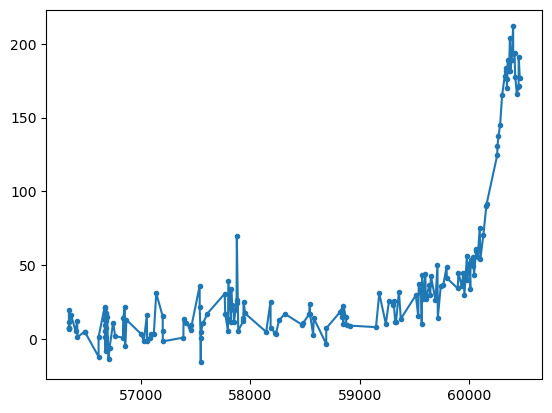

In [624]:

#df = dic_df_poly1[13]

df = dic_df_57[117]

idx = df.good
t = df[idx]['mjd'].values
#f = df[idx]['Jyas2'].values
f = df[idx]['fluxADU'].values
f_err = df[idx]['flux_err'].values

plt.plot(t, f, '.-')

In [625]:


tshift, a, b = get_tshift_scale_offset(T_model, F_model, t, f)

In [629]:
tshift, a, b

(2962.7047223647314, 6.797039934526299, 250.09324969958953)

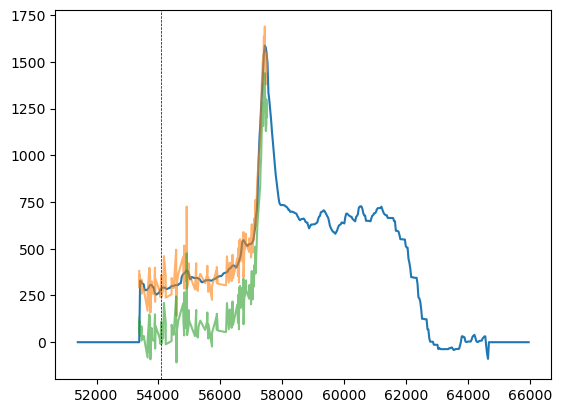

In [636]:


plt.plot(T_model, F_model)
plt.plot(t-tshift, a*f+b, alpha=.6)
plt.plot(t-tshift, a*f, alpha=.6)

# template
plt.axvline(x=57050-tshift, color='k', lw=.5, ls='--')



In [642]:
np.log10(10)

1.0

m = -2.5*log10(F) + m_zero

/var/folders/yb/hm0wbr8128v_fbvy474l5s6m0000gn/T/ipykernel_8838/488615437.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(T_model, -2.5*np.log10(F_model) + 30.2)
/var/folders/yb/hm0wbr8128v_fbvy474l5s6m0000gn/T/ipykernel_8838/488615437.py:1: RuntimeWarning: invalid value encountered in log10
  plt.plot(T_model, -2.5*np.log10(F_model) + 30.2)


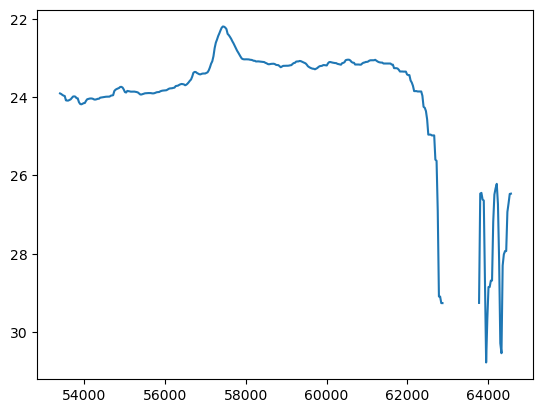

In [941]:
plt.plot(T_model, -2.5*np.log10(F_model) + 30.2)
plt.gca().invert_yaxis()


Text(0, 0.5, 'mag')

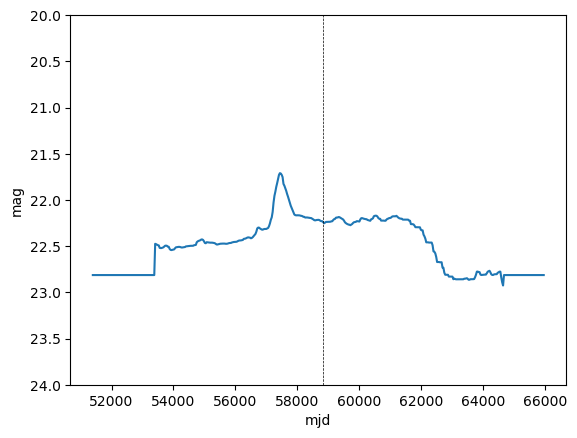

In [938]:
plt.plot(T_model, -2.5*np.log10(F_model+901) + 30.2)
#plt.plot(t-tshift, a*f+b, alpha=.6)
#plt.plot(t-tshift, a*f, alpha=.6)

# template
plt.axvline(x=57050-tshift, color='k', lw=.5, ls='--')

plt.gca().invert_yaxis()

plt.ylim([24, 20])

plt.xlabel('mjd')
plt.ylabel('mag')

load old 

In [652]:
dic_df_comet[0]

ID     x     y  bsize           mjd     zpt  fluxADU  flux_err  X2norm  \
0     0  3526  1413      3  56341.211110  30.202   -16.13      4.71    1.03   
1     0  3526  1413      3  56341.216066  30.202    -7.66      4.47    1.53   
2     0  3526  1413      3  56341.219000  30.202   -13.74      5.20    1.88   
3     0  3526  1413      3  56343.220957  30.202     0.92      5.04    2.04   
4     0  3526  1413      3  56343.222439  30.202    -9.53      5.23    0.87   
..   ..   ...   ...    ...           ...     ...      ...       ...     ...   
216   0  3526  1413      3  60427.043023  30.202    27.51     14.54    1.79   
217   0  3526  1413      3  60448.009484  30.202    73.97      8.06    0.72   
218   0  3526  1413      3  60449.048751  30.202   -29.16      7.06    2.04   
219   0  3526  1413      3  60450.068074  30.202    20.20      9.01    1.01   
220   0  3526  1413      3  60460.091694  30.202    19.56      7.47    1.30   

     Npix  ...  filter  CONVOL00  PHOTNORM  KSUM00  FSIG00 FSCAT00   FWHM  \
0       9  ...       i  TEMPLATE         t  1.0452   1.347   0.103  3.788   
1       9  ...       i  TEMPLATE         t  1.0498   1.313   0.081  4.188   
2       9  ...       i  TEMPLATE         t  1.0500   1.354   0.105  4.034   
3       9  ...       i  TEMPLATE         t  1.0607   1.308   0.088  4.009   
4       9  ...       i  TEMPLATE         t  1.0589   1.311   0.087  4.075   
..    ...  ...     ...       ...       ...     ...     ...     ...    ...   
216     9  ...       i  TEMPLATE         t  0.6809   1.307   0.169  2.864   
217     9  ...       i  TEMPLATE         t  0.9702   1.399   0.255  4.925   
218     9  ...       i  TEMPLATE         t  0.9850   1.258   0.140  6.056   
219     9  ...       i  TEMPLATE         t  0.9391   1.228   0.126  3.777   
220     9  ...       i  TEMPLATE         t  0.9833   1.708   0.404  3.464   

    M5SIGMA  SKYADU  good  
0    23.178  1144.0  True  
1    23.108  1127.0  True  
2    23.125  1142.0  True  
3    23.064  1322.0  True  
4    23.029  1343.0  True  
..      ...     ...   ...  
216  22.270  3707.0  True  
217  22.265  2307.0  True  
218  22.176  2035.0  True  
219  22.458  2757.0  True  
220  22.755  2133.0  True  

[221 rows x 27 columns]

54, dust 45, background 1553

57, dust 41, background 901

comet, dust 72, background 1573


In [663]:
lcfiles = glob.glob('./eta/lelc/ec0915a54/i/ec0915a54.i.*.DECAM.*lelc.txt')

lcfiles.sort()
#ec0915a54.i.160305.DECAM.x45344.a54.ID034.G03.lelc.txt

In [664]:
len(lcfiles)

44

In [665]:
lctxt = lcfiles[0]

In [676]:
IDs = []
df_comet = {}
for lctxt in lcfiles:
    ID = int(lctxt[62:64]) # get ID from file namea
    IDs.append(ID)

    df = pd.read_csv(lctxt, sep='\s+')
    
    df = df[ df['le_flux'].astype('str').values != '-' ].copy()

    idx_drop = df['#ID'][df['le_dflux_tot'].astype(float)>=80].index.to_list()
    
    #idx_drop = []
    #idx_drop = [58, 59, 60, 61, 180, 199]
    #print('drop', idx_drop)
    df.drop(idx_drop, inplace=True)   
    # reset index
    df.reset_index() 

    df_comet[ID] = df

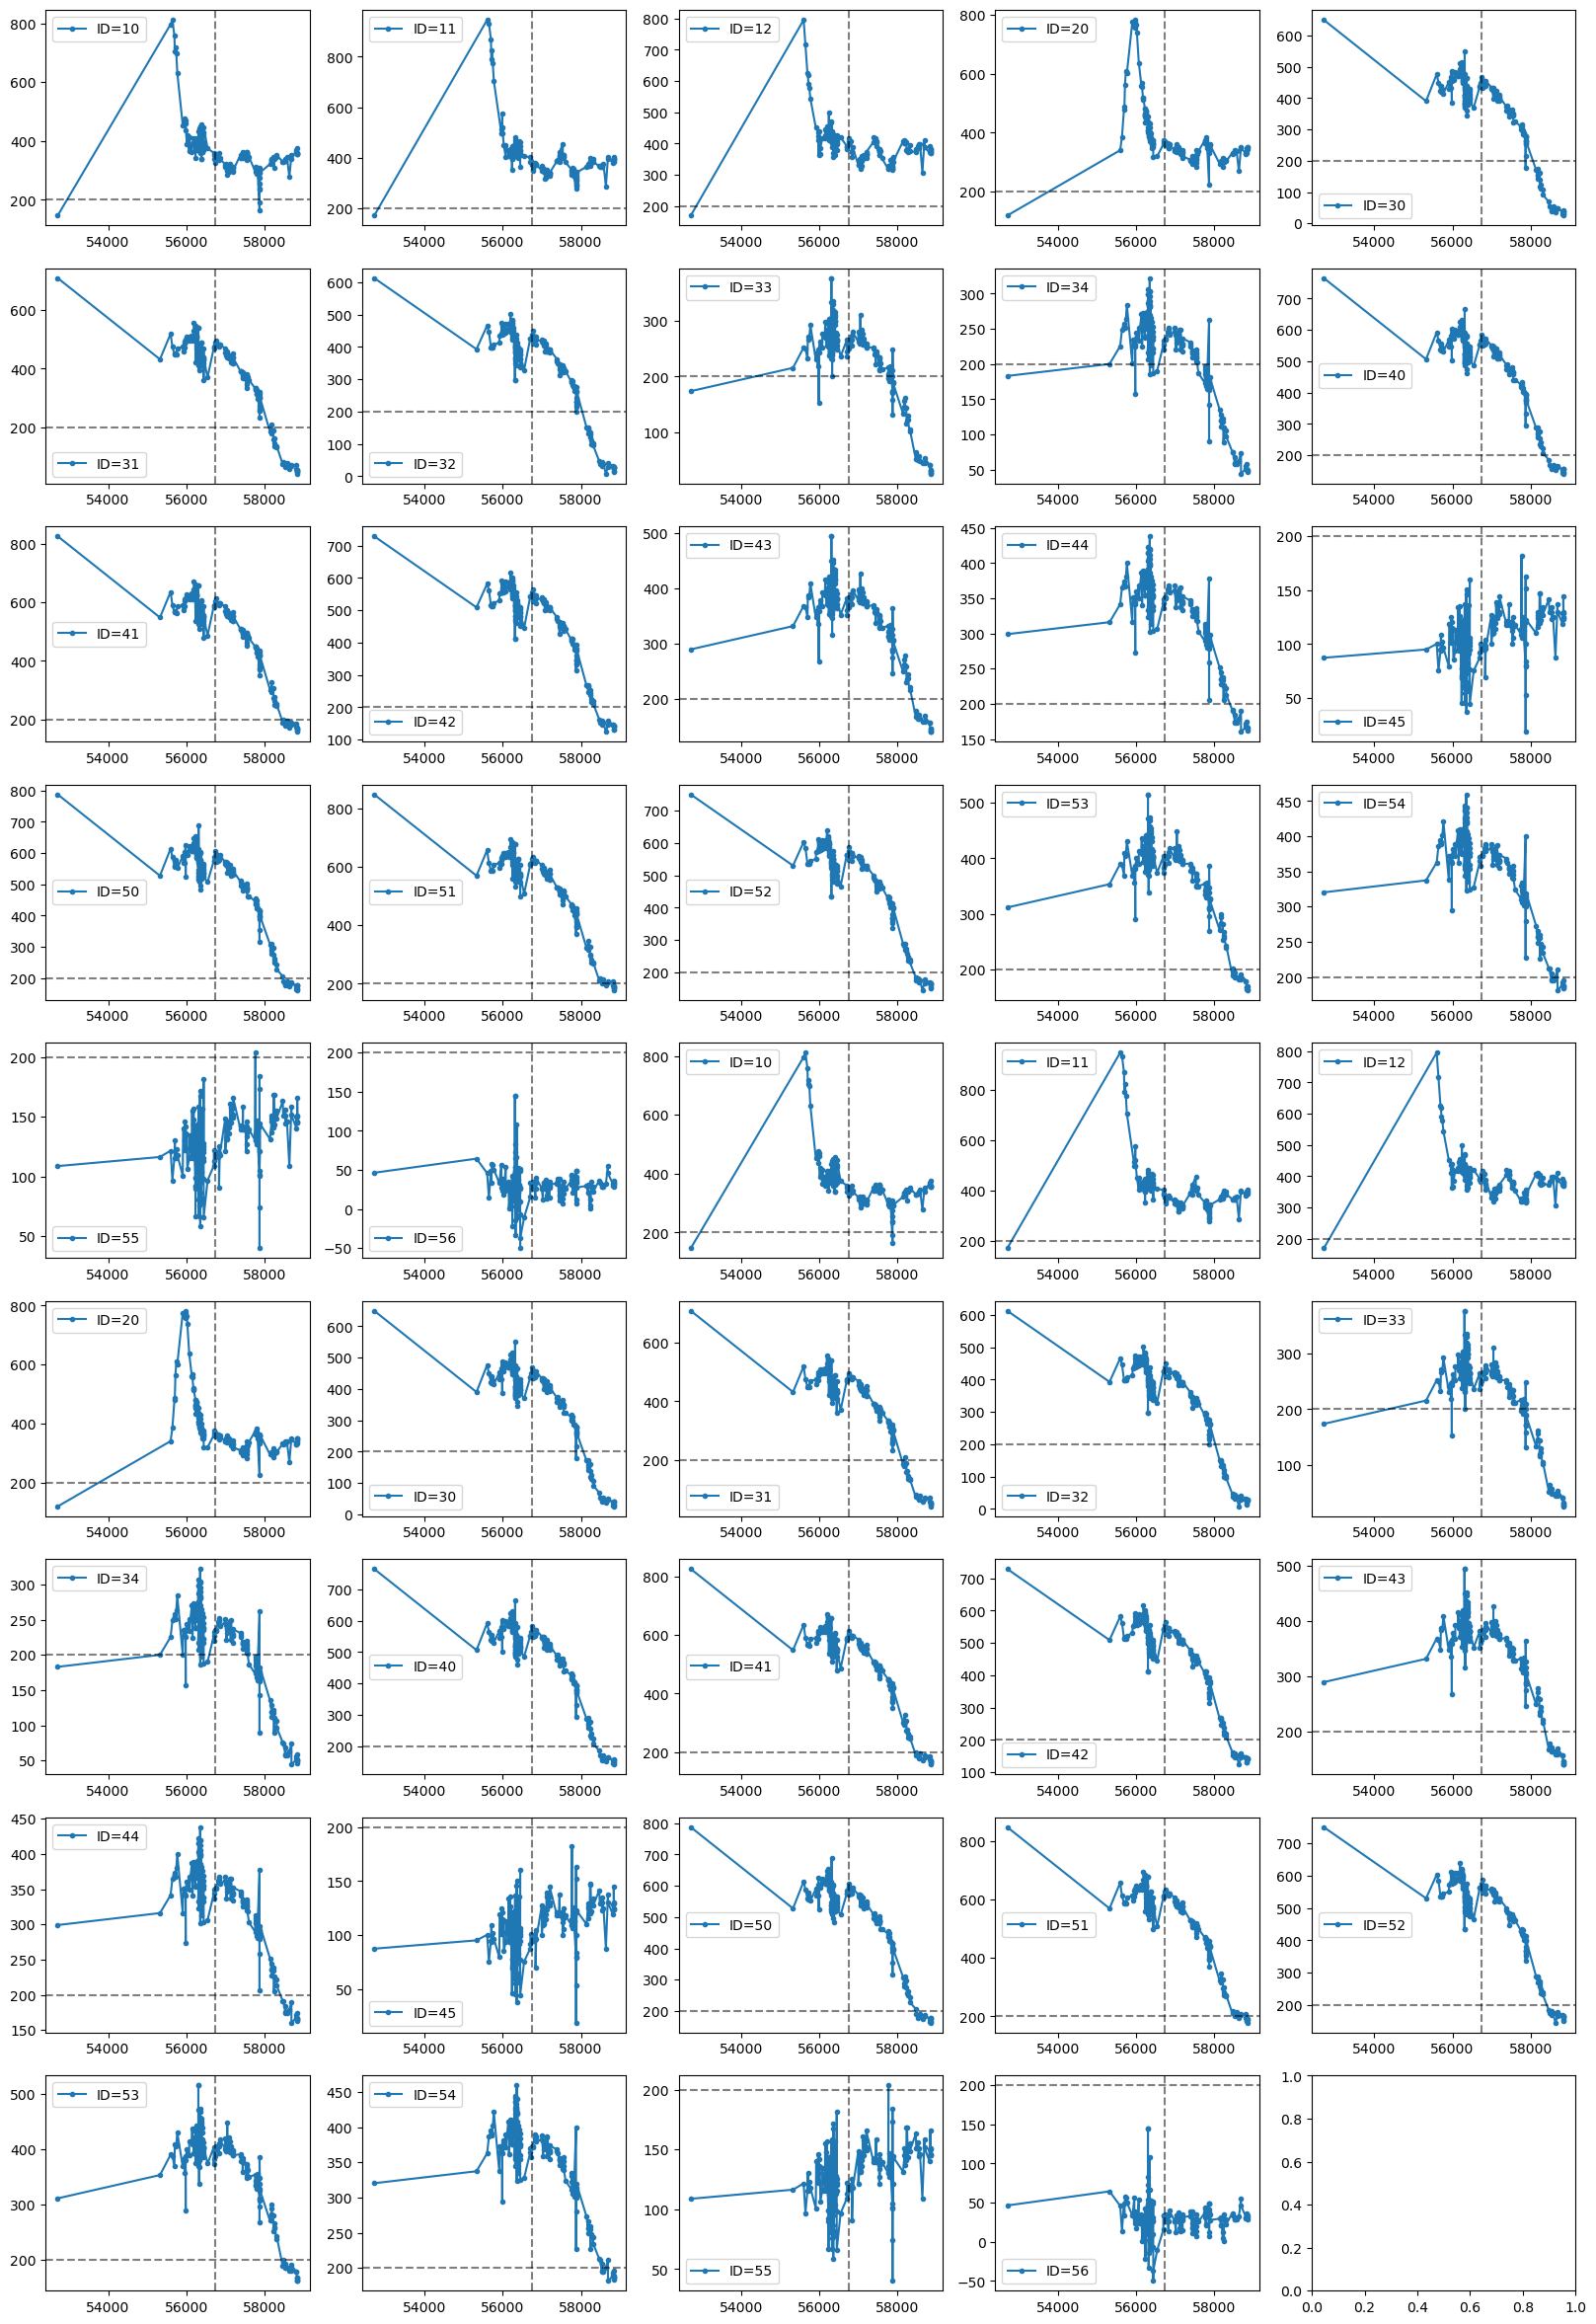

In [677]:
fig, axs = plt.subplots(9, 5, figsize=(20, 30))
axs = axs.flatten()
for i in range(len(IDs)):    
    df = df_comet[IDs[i]]
    
    x = df['MJD-OBS'].values
    y = df['le_flux'].values.astype(np.float16)
    axs[i].plot(x, y, '.-', label=f'ID={IDs[i]}');
    axs[i].axvline(x=56745, color='k', ls='--', alpha=.5)
    axs[i].axhline(y=200, color='k', ls='--', alpha=.5)
    axs[i].legend()


In [982]:
df_ = df_comet[IDs[2]]

t = df_['MJD-OBS'].values
f = df_['le_flux'].values.astype(np.float16)


In [741]:

tshift, a, b = get_tshift_scale_offset(T_model, F_model, t, f)

In [742]:
a

1.0

In [743]:
tshift

-1792.0139796352669

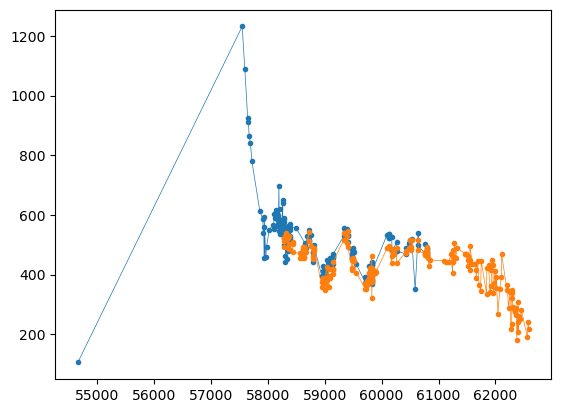

In [1090]:
plt.plot(t+1950, f*1.8-200, '.-', linewidth=.5) # old reduction
plt.plot(df[df.good]['mjd']+1950, 1.8*df[df.good]['fluxADU']+520, '.-',alpha=1, linewidth=0.5) # new reduction


Text(0, 0.5, 'flux')

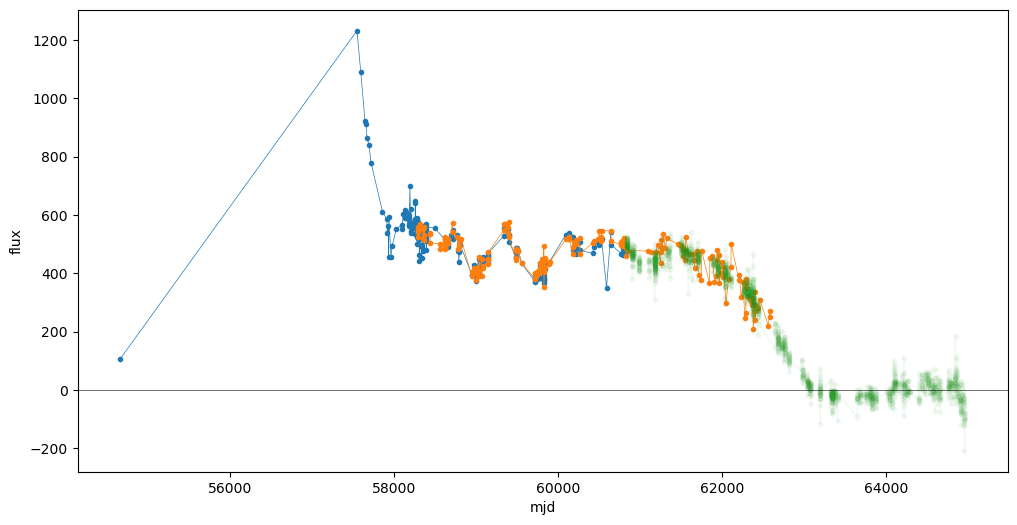

(53000.0, 65000.0)

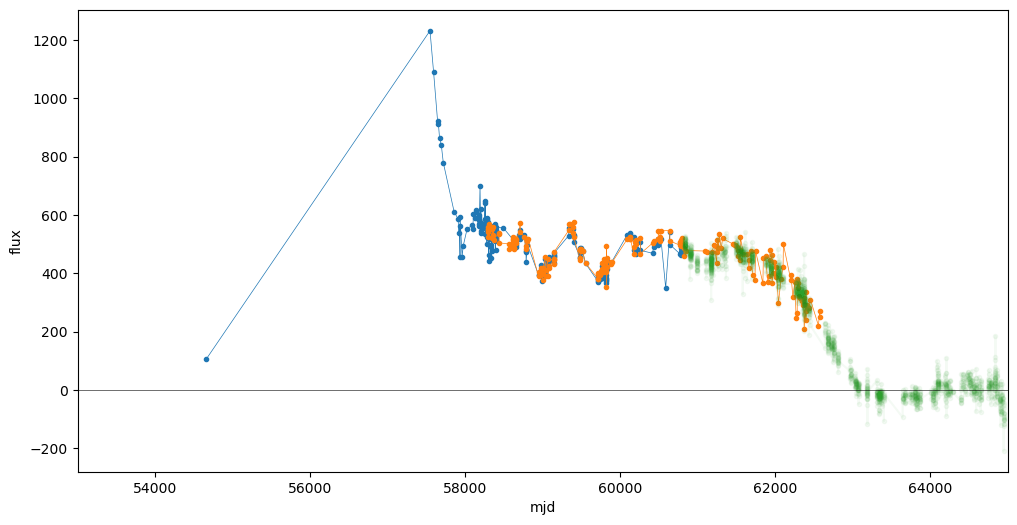

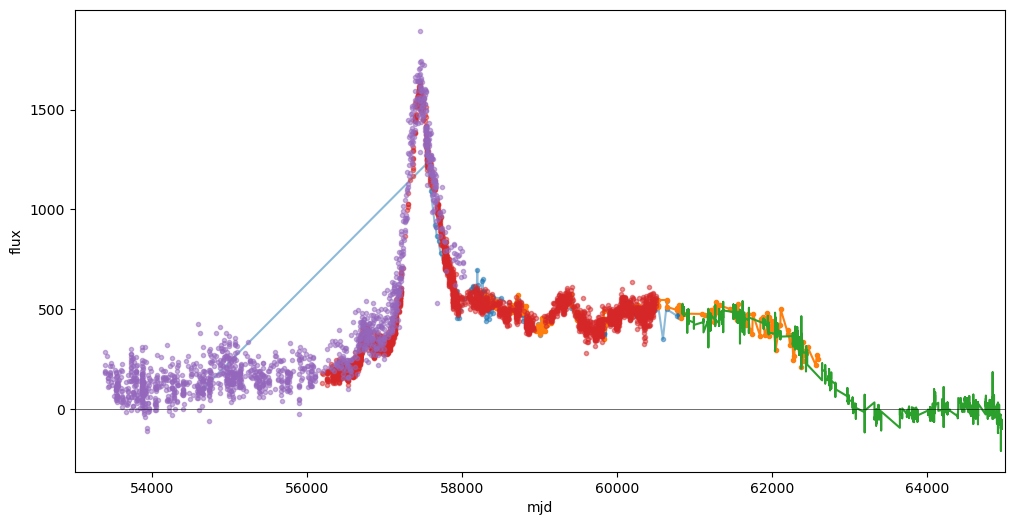

In [1127]:

plt.figure(figsize=(12, 6))

plt.plot(t+1950, f*1.8-200, '.-', linewidth=.5) # old reduction
plt.plot(df[df.good]['mjd']+1950, 1.8*df[df.good]['fluxADU']+550, '.-',alpha=1, linewidth=0.5, ) # new reduction

plt.plot(T_master_comet_cliped+4500, 1.2*F_master_comet_cliped, '.-', alpha=0.05)

plt.axhline(y=0, color='k', linewidth=0.4)

plt.xlabel('mjd')
plt.ylabel('flux')
plt.xlim([53000, 65000])
#------------------------
plt.figure(figsize=(12, 6))


plt.plot(t+1950, f*1.8-200, '.-', alpha=.5)

plt.plot(df[df.good]['mjd']+1950, 1.8*df[df.good]['fluxADU']+550, '.-',alpha=1, )

plt.plot(T_master_comet_cliped+4500, 1.2*F_master_comet_cliped)

plt.plot(T_master_54_cliped, F_master_54_cliped, '.', alpha=0.5)

plt.plot(T_master_57_cliped, 1.1*F_master_57_cliped-200, '.', alpha=.5)
#plt.plot(T_master_57, 1.1*F_57_smooth -200, '.', alpha=.5)

plt.axhline(y=0, color='k', linewidth=0.4)

plt.xlabel('mjd')
plt.ylabel('flux')

plt.xlim([53000, 65000])

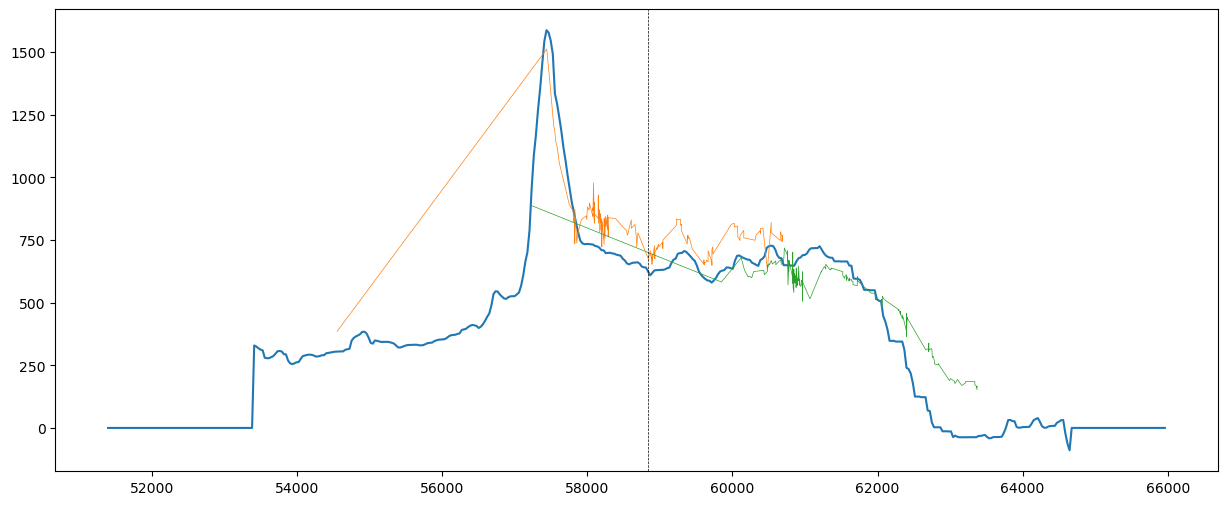

In [973]:

plt.figure(figsize=(15, 6))
plt.plot(T_model, F_model)

a = 1.8
b = 80

plt.plot(t-tshift + 50, a*f+b, alpha=1, linewidth=0.5)
#plt.plot(t-tshift, a*f, alpha=.6)

#---old comet reduction---
df = df_comet[IDs[32]]

t_comet = df['MJD-OBS'].values
f_comet = df['le_flux'].values.astype(np.float16)

a = 1.1
b = -20
plt.plot(t_comet-tshift + 2730, a*f_comet+b, alpha=1, linewidth=0.5)

# template
plt.axvline(x=57050-tshift, color='k', lw=.5, ls='--')





In [791]:
def load_lc_from_url(tmpID, posID, field=54):
    '''load light curve from url 
    https://stsci-transients.stsci.edu/eta/etalc/results
    return: DataFrame'''
    #txtfile = f'https://stsci-transients.stsci.edu/eta/etalc/results/rod_test/ec0915/54/ec0915_54_poly1pos_i_tmpl{tmpID}_ID{posID}_lc.txt'
    if field==54:
        txtfile =f'https://stsci-transients.stsci.edu/eta/etalc/results/rod_test/ec0915i_poly1/ec0915/54/ec0915_54_poly1pos_i_tmpl{tmpID}_ID{posID}_lc.txt'
    elif field==57:
        txtfile=f'https://stsci-transients.stsci.edu/eta/etalc/results/rod_test/ec0915/57/ec0915_57_poly1pos_i_tmpl{tmpID}_ID{posID}_lc.txt'
    elif field==42:
        txtfile=f'https://stsci-transients.stsci.edu/eta/etalc/results/rod_test/ec0814/r_poly1A/ec0814/42/ec0814a42_poly1Apos_r_tmpl{tmpID}_ID{posID}_lc.txt'
    
    #df = pd.read_csv(txtfile, delim_whitespace=True)
    df = pd.read_csv(txtfile, sep='\s+')
    
    # remove nan 
    df = df[df['Jyas2'].notna()]
    
    df['Jyas2'] *= 1e6
    df['Jyas2_err'] *= 1e6

    #idx_drop = df['ID'][df['Jyas2_err']>=1].index.to_list()
    #idx_drop = [58, 59, 60, 61, 180, 199]
    #print('drop', idx_drop)
    #df.drop(idx_drop, inplace=True)   
    # reset index
    #df.reset_index() 
    df['good'] = df['Jyas2_err']<=1
    
    return df


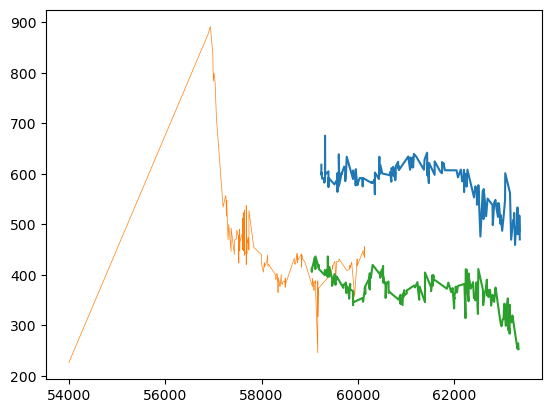

In [918]:
ID = 289

txtfile = f'https://stsci-transients.stsci.edu/eta/etalc/results/rod_test/ec0915/i_poly3/ec0915/54/ec0915_54_poly3pos_i_tmpl296582_ID{ID}_lc.txt'
#df = pd.read_csv(txtfile, delim_whitespace=True)
df = pd.read_csv(txtfile, sep='\s+')

# remove nan 
df = df[df['Jyas2'].notna()]

df['Jyas2'] *= 1e6
df['Jyas2_err'] *= 1e6
#idx_drop = df['ID'][df['Jyas2_err']>=1].index.to_list()
#idx_drop = [58, 59, 60, 61, 180, 199]
#print('drop', idx_drop)
#df.drop(idx_drop, inplace=True)   
# reset index
#df.reset_index() 
df['good'] = df['Jyas2_err']<=1



#--------
#plt.plot(T_model, F_model)

plt.plot(df[df.good]['mjd']+2900, 1*df[df.good]['fluxADU']+600, '-',alpha=1, )

df_ = df_comet[IDs[32]]

t_comet = df_['MJD-OBS'].values
f_comet = df_['le_flux'].values.astype(np.float16)

a = 1.2
b = -10
#plt.plot(t_comet-tshift + 2730, a*f_comet+b, alpha=1, linewidth=1)


#-------=
a = 1
b = 80

plt.plot(t-tshift - 500, a*f+b, alpha=1, linewidth=0.5)
# -------
plt.plot(t_-200, f_-200)

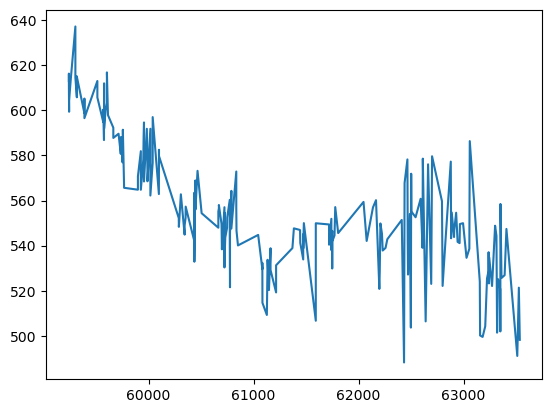

In [920]:
ID = 652

txtfile = f'https://stsci-transients.stsci.edu/eta/etalc/results/rod_test/ec0915/i_poly1/ec0915/54/ec0915_54_poly1pos_i_tmpl296582_ID{ID}_lc.txt'
#df = pd.read_csv(txtfile, delim_whitespace=True)
df = pd.read_csv(txtfile, sep='\s+')

# remove nan 
df = df[df['Jyas2'].notna()]

df['Jyas2'] *= 1e6
df['Jyas2_err'] *= 1e6
#idx_drop = df['ID'][df['Jyas2_err']>=1].index.to_list()
#idx_drop = [58, 59, 60, 61, 180, 199]
#print('drop', idx_drop)
#df.drop(idx_drop, inplace=True)   
# reset index
#df.reset_index() 
df['good'] = df['Jyas2_err']<=1

plt.plot(df[df.good]['mjd']+2900, 1*df[df.good]['fluxADU']+600, '-',alpha=1, )

t_ = df[df.good]['mjd']+2900
f_ = 1*df[df.good]['fluxADU']+600
#-------


In [850]:
df.columns

Index(['ID', 'x', 'y', 'bsize', 'mjd', 'zpt', 'fluxADU', 'flux_err', 'X2norm',
       'Npix', 'Nmask', 'Jyas2', 'Jyas2_err', 'SB', 'SB_err', 'skip', 'imID',
       'filter', 'CONVOL00', 'PHOTNORM', 'KSUM00', 'FSIG00', 'FSCAT00', 'FWHM',
       'M5SIGMA', 'SKYADU', 'good'],
      dtype='object')

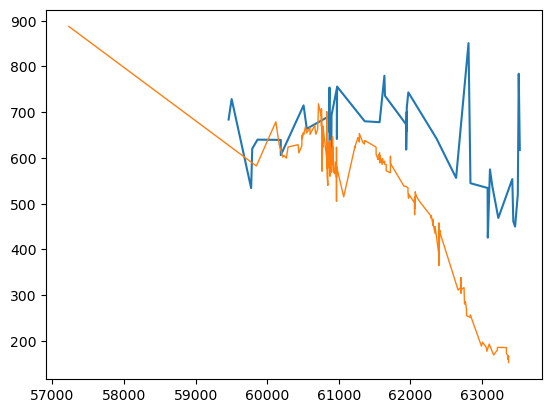

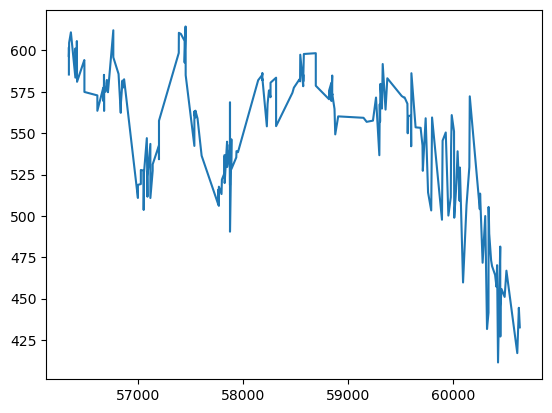

In [984]:
txtfile = f'https://stsci-transients.stsci.edu/eta/etalc/results/rod_test/ec0915/i_Armins/ec0915/54/ec0915a54_Arminspos_i_tmpl296582_ID2_lc.txt'
#df = pd.read_csv(txtfile, delim_whitespace=True)
df = pd.read_csv(txtfile, sep='\s+')

# remove nan 
df = df[df['Jyas2'].notna()]

df['Jyas2'] *= 1e6
df['Jyas2_err'] *= 1e6
#idx_drop = df['ID'][df['Jyas2_err']>=1].index.to_list()
#idx_drop = [58, 59, 60, 61, 180, 199]
#print('drop', idx_drop)
#df.drop(idx_drop, inplace=True)   
# reset index
#df.reset_index() 
df['good'] = df['Jyas2_err']<=1

plt.plot(df[df.good]['mjd'], 1*df[df.good]['fluxADU']+600, '-',alpha=1, )




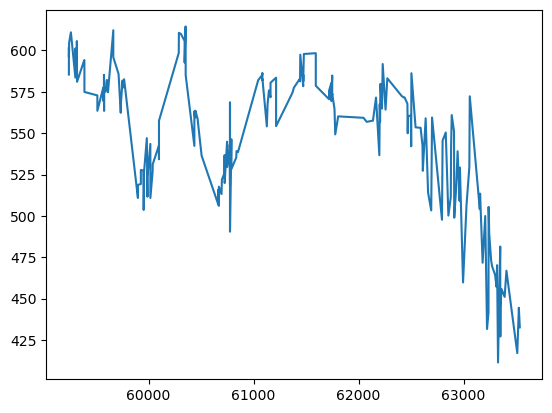

In [942]:

txtfile = f'https://stsci-transients.stsci.edu/eta/etalc/results/rod_test/ec0915/i_Armins/ec0915/54/ec0915a54_Arminspos_i_tmpl296582_ID2_lc.txt'
#df = pd.read_csv(txtfile, delim_whitespace=True)
df = pd.read_csv(txtfile, sep='\s+')

# remove nan 
df = df[df['Jyas2'].notna()]

df['Jyas2'] *= 1e6
df['Jyas2_err'] *= 1e6
#idx_drop = df['ID'][df['Jyas2_err']>=1].index.to_list()
#idx_drop = [58, 59, 60, 61, 180, 199]
#print('drop', idx_drop)
#df.drop(idx_drop, inplace=True)   
# reset index
#df.reset_index() 
df['good'] = df['Jyas2_err']<=1

plt.plot(df[df.good]['mjd']+2900, 1*df[df.good]['fluxADU']+600, '-',alpha=1, )

t_ = df[df.good]['mjd']+2900
f_ = 1*df[df.good]['fluxADU']+600
#-------


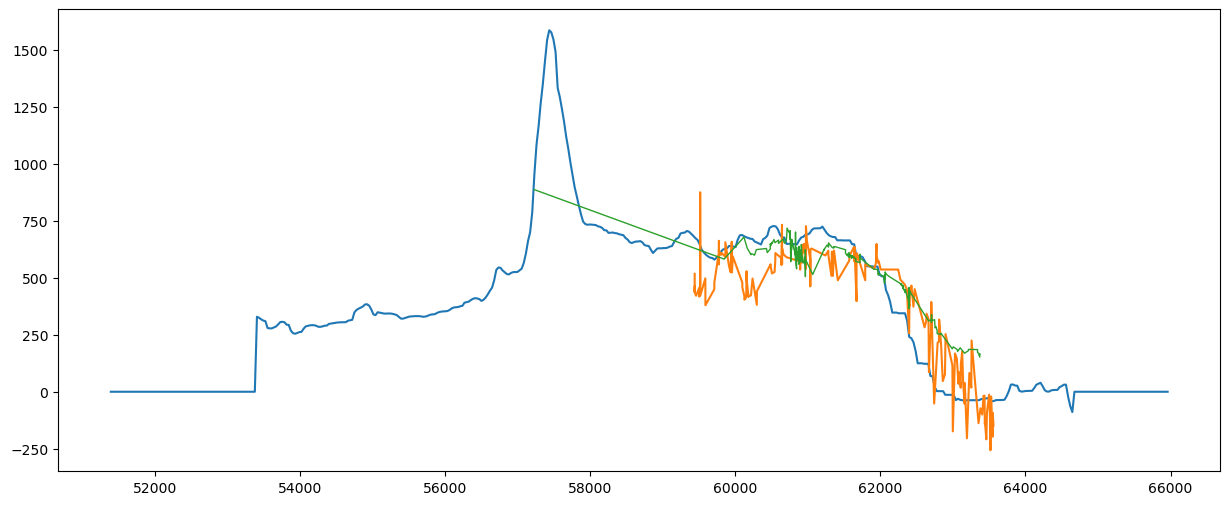

In [847]:
plt.figure(figsize=(15, 6))

plt.plot(T_model, F_model)

plt.plot(df[df.good]['mjd']+3100, 4*df[df.good]['fluxADU']+600, '-',alpha=1, )


df_ = df_comet[IDs[32]]

t_comet = df_['MJD-OBS'].values
f_comet = df_['le_flux'].values.astype(np.float16)

a = 1.1
b = -20
plt.plot(t_comet-tshift + 2730, a*f_comet+b, alpha=1, linewidth=1)
